<a href="https://colab.research.google.com/github/Doragon-RH/Hello-World/blob/main/%E5%9C%B0%E7%90%86%E6%83%85%E5%A0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import shapely
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import glob
import platform

In [ ]:
point =

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
import shapefile
from shapely.geometry import Point, LineString, Polygon
from osgeo import ogr, osr
import pyproj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
src_dam = shapefile.Reader(DAM_PATH, encoding='cp932')  # Shapefile読込
shps_dam = src_dam.shapes()  # シェープ（ジオメトリ情報）
recs_dam = src_dam.records()  # レコード（属性情報）
print(f'number of shapes = {len(shps_dam)}')  # シェープの数
print(f'number of records = {len(recs_dam)}')  # レコードの数
# ライン（河川データ）
src_river = shapefile.Reader(RIVER_PATH, encoding='cp932')  # Shapefile読込
shps_river = src_river.shapes()  # ジオメトリ情報
recs_river = src_river.records()  # 属性情報
# ポリゴン（湖沼データ）
src_lake = shapefile.Reader(LAKE_PATH, encoding='cp932')  # Shapefile読込
shps_lake = src_lake.shapes()  # ジオメトリ情報
recs_lake = src_lake.records()  # 属性情報
# ポリゴン（農場データ）
src_farm = shapefile.Reader(FARM_PATH, encoding='cp932')  # Shapefile読込
shps_farm = src_farm.shapes()  # ジオメトリ情報
recs_farm = src_farm.records()  # 属性情報

In [ ]:
gdf_point=gdf_point[['longitude','latitude','geometry']]
gdf_point

,longitude,latitude,geometry
0,139.675971,35.709461,POINT (139.67597 35.70946)
1,140.060915,35.637350,POINT (140.06092 35.63735)
2,139.702038,35.716386,POINT (139.70204 35.71639)
3,140.045165,35.674334,POINT (140.04517 35.67433)
4,139.605822,35.322869,POINT (139.60582 35.32287)
...,...,...,...
4995,139.622701,35.535861,POINT (139.62270 35.53586)
4996,139.476693,35.502908,POINT (139.47669 35.50291)
4997,139.690265,35.780145,POINT (139.69027 35.78014)
4998,139.432066,35.551410,POINT (139.43207 35.55141)


In [ ]:
gdf_price=gpd.read_file("/content/drive/MyDrive/個人学習内容/landprice_250mesh_lit.shp")
print(gdf_price)

        los_land_p      sq                                           geometry
0          27600.0       1  POLYGON ((139.98438 35.32500, 139.98438 35.327...
1          27600.0       2  POLYGON ((139.98438 35.32917, 139.98438 35.331...
2          27600.0       3  POLYGON ((139.98438 35.32708, 139.98438 35.329...
3          27600.0       4  POLYGON ((139.98750 35.32708, 139.98750 35.329...
4          27600.0       5  POLYGON ((139.99375 35.32708, 139.99375 35.329...
...            ...     ...                                                ...
110818     36300.0  110819  POLYGON ((138.97188 35.57292, 138.97188 35.575...
110819     36300.0  110820  POLYGON ((138.97500 35.57292, 138.97500 35.575...
110820     36300.0  110821  POLYGON ((138.97813 35.57292, 138.97813 35.575...
110821     36300.0  110822  POLYGON ((138.95000 35.57292, 138.95000 35.575...
110822     36300.0  110823  POLYGON ((138.95313 35.57083, 138.95313 35.572...

[110823 rows x 3 columns]


In [ ]:
price_point=gdf_price.copy()
# もとのCRSを保存
original_crs = gdf_price.crs
print(original_crs)
# 投影座標系に変換 このように変形することで、警告が表示されなくなる
gdf_price = gdf_price.to_crs(epsg=3857)  # EPSG:3857 はメルカトル投影

# centroid を計算
gdf_price['centroid'] = gdf_price.geometry.centroid

# 元のCRSに戻す
# gdf_price = gdf_price.to_crs(original_crs)
# gdf_price
# centroid を geometry 列に設定
price_point['geometry']=gpd.GeoSeries(gdf_price['centroid'])

# 'centroid' 列を 'geometry' にコピー
price_point=gpd.GeoDataFrame(price_point)
price_point = price_point.to_crs(epsg=4326) #世界測地系(緯度経度？)

# 結果を表示
print(price_point)

EPSG:3857
        los_land_p      sq                    geometry  \
0          27600.0       1  POINT (139.98594 35.32604)   
1          27600.0       2  POINT (139.98594 35.33021)   
2          27600.0       3  POINT (139.98594 35.32813)   
3          27600.0       4  POINT (139.98906 35.32813)   
4          27600.0       5  POINT (139.99531 35.32813)   
...            ...     ...                         ...   
110818     36300.0  110819  POINT (138.97344 35.57396)   
110819     36300.0  110820  POINT (138.97656 35.57396)   
110820     36300.0  110821  POINT (138.97969 35.57396)   
110821     36300.0  110822  POINT (138.95156 35.57396)   
110822     36300.0  110823  POINT (138.95469 35.57188)   

                                centroid  
0       POINT (15583163.281 4208277.654)  
1       POINT (15583163.281 4208846.176)  
2       POINT (15583163.281 4208561.911)  
3       POINT (15583511.154 4208561.911)  
4       POINT (15584206.901 4208561.911)  
...                                

In [ ]:
price_point=price_point[['los_land_p','sq','geometry']]
price_point

,los_land_p,sq,geometry
0,27600.0,1,POINT (139.98594 35.32604)
1,27600.0,2,POINT (139.98594 35.33021)
2,27600.0,3,POINT (139.98594 35.32813)
3,27600.0,4,POINT (139.98906 35.32813)
4,27600.0,5,POINT (139.99531 35.32813)
...,...,...,...
110818,36300.0,110819,POINT (138.97344 35.57396)
110819,36300.0,110820,POINT (138.97656 35.57396)
110820,36300.0,110821,POINT (138.97969 35.57396)
110821,36300.0,110822,POINT (138.95156 35.57396)


In [ ]:
# CRS（座標参照系）が一致しているか確認し、異なる場合は変換する
if price_point.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(price_point.crs)

# 空間インデックスを作成して効率的な空間クエリを実行
place_sindex = gdf_place.sindex

# price_pointにgdf_placeのインデックスを格納する新しい列を追加
price_point['place_index'] = None

# gdf_placeのgeometry列以外の列を取得
place_columns = gdf_place.columns.difference(['geometry'])

# price_pointにgdf_placeの全ての列を追加（geometry列以外）
for col in place_columns:
    price_point[col] = None

# price_pointのポイントがgdf_placeのポリゴンに含まれているかを確認し、gdf_placeのインデックスと情報を追加
for idx, row in price_point.iterrows():
    possible_matches_index = list(place_sindex.intersection(row.geometry.bounds))
    possible_matches = gdf_place.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.contains(row.geometry)]
    if not precise_matches.empty:
        place_index = precise_matches.index.tolist()[0]
        price_point.at[idx, 'place_index'] = place_index
        for col in place_columns:
            price_point.at[idx, col] = gdf_place.at[place_index, col]

# フィルタリング結果を表示
print(price_point)

    index  price  p_index  household  A29_005                    geometry  \
0    9607  20613        1        950   工業専用地域  POINT (140.00144 35.67086)   
1   31456  22610        6        700     工業地域  POINT (139.83594 35.74688)   
2   41808  22793        7        100     工業地域  POINT (139.40156 35.33854)   
3   42506  24036        8        200     工業地域  POINT (139.42969 35.49896)   
4    5466  24749        9        300     工業地域  POINT (139.65781 35.82813)   
5    6495  22161        4        650  第一種住居地域  POINT (139.66291 35.99826)   
6    6829  25450       11        300   工業専用地域  POINT (139.84094 35.92971)   
7    7566  22059        3        150    準工業地域  POINT (140.07402 35.61404)   
8   10095  21100        2        500     None  POINT (140.03178 35.46491)   
9   37784  24866       10        350     商業地域  POINT (139.63048 35.46327)   
10  39676  22403        5        150    準工業地域  POINT (139.59915 35.60440)   
11  33047  28862       12        300     工業地域  POINT (139.46055 35.68020)   

In [ ]:
price_point=price_point[['los_land_p','A29_001','sq','A29_006','A29_007','place_index','geometry']]
price_point

KeyError: "['los_land_p', 'sq'] not in index"

In [ ]:
price_point.to_file(r"/content/drive/MyDrive/個人学習内容/landprice_250mesh_lit.shp")

<ipython-input-80-b08120498e56>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  price_point.to_file(r"/content/drive/MyDrive/個人学習内容/landprice_250mesh_lit.shp")


ValueError: Invalid field type <class 'numpy.int64'>

In [ ]:
price=price_point[price_point['place_index'].notnull()]
price

,los_land_p,A29_001,sq,A29_006,A29_007,place_index,geometry
1,27600.0,12206,2,60,200,8538,POINT (139.98594 35.33021)
3,27600.0,12206,4,60,200,8538,POINT (139.98906 35.32813)
4,27600.0,12206,5,60,200,8538,POINT (139.99531 35.32813)
6,27600.0,12206,7,60,200,8538,POINT (139.98906 35.32604)
8,27600.0,12206,9,60,200,8538,POINT (139.99531 35.32604)
...,...,...,...,...,...,...,...
110259,36300.0,19206,110260,60,200,42971,POINT (138.95156 35.61354)
110260,36300.0,19206,110261,60,200,42971,POINT (138.96094 35.61146)
110261,36300.0,19206,110262,60,200,42972,POINT (138.95781 35.61354)
110280,36300.0,19206,110281,60,200,42956,POINT (138.93594 35.60938)


In [ ]:
min(gdf_price['los_land_p'])

20024.557956778

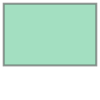

In [ ]:
gdf_price['geometry'][1]

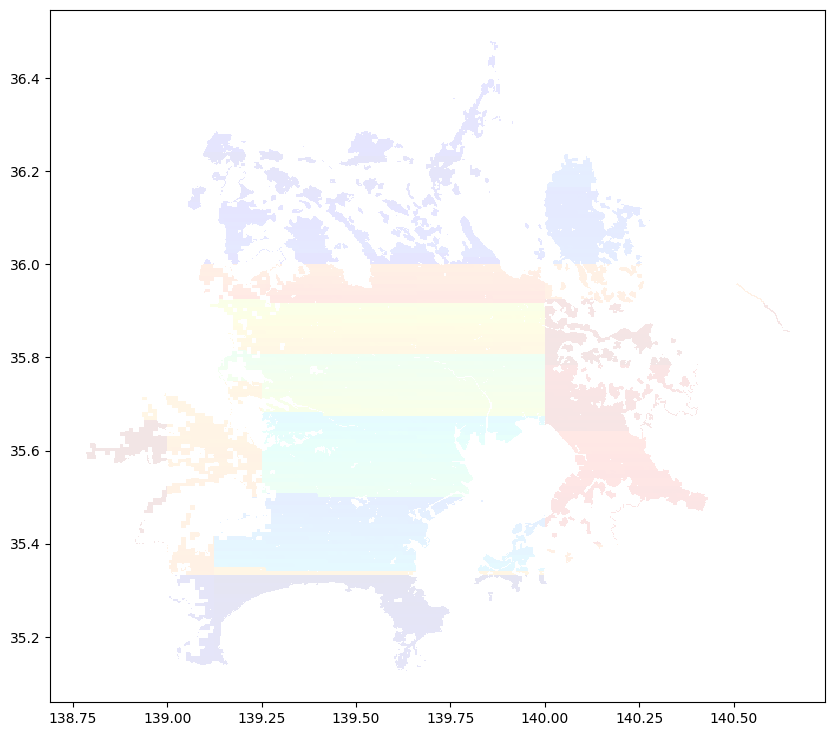

In [ ]:
gdf_price['geometry'].plot(alpha=0.1, cmap='jet', figsize=(10, 10))#ポリゴンデータの可視化
plt.show()

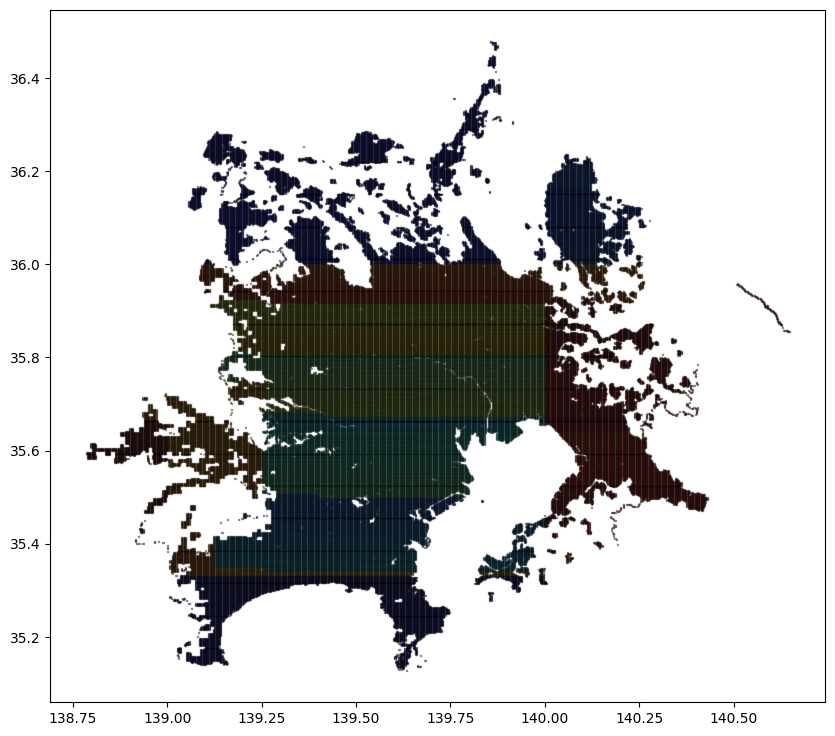

In [ ]:
gdf_price['geometry'].plot(alpha=0.4, cmap='jet', edgecolor='black', figsize=(10, 10))
plt.show()

In [ ]:
# price_point=price_point[["index","price","p_index","household","A29_002","A29_003","A29_005","geometry"]]
price_point

,index,price,p_index,household,A29_005,geometry,クラスタ毎の費用,クラスタ毎の輸送距離,クラスタ毎の地価,A29_002,A29_003,place_index,A29_001
0,9607,20613,1,950,工業専用地域,POINT (140.00144 35.67086),9.359165e+06,3.825950e+09,4699764.0,千葉県,習志野市,8489,12204
1,31456,22610,6,700,準工業地域,POINT (139.83594 35.74688),5.935914e+06,3.526605e+09,3798480.0,東京都,葛飾区,31450,13122
2,41808,22793,7,100,工業地域,POINT (139.40156 35.33854),4.615123e+06,2.785673e+09,547032.0,神奈川県,茅ヶ崎市,41808,14207
3,42506,24036,8,200,準工業地域,POINT (139.42969 35.49896),6.806813e+06,3.753424e+09,1153728.0,神奈川県,座間市,42503,14216
4,5466,24749,9,300,商業地域,POINT (139.65781 35.82813),3.558475e+06,2.205052e+09,1781928.0,埼玉県,戸田市,5481,11224
5,6495,22161,4,650,第一種住居地域,POINT (139.66291 35.99826),2.278556e+07,1.218414e+10,3457116.0,埼玉県,蓮田市,6495,11238
6,6829,25450,11,300,準工業地域,POINT (139.84094 35.92971),2.279882e+07,1.182481e+10,1832400.0,埼玉県,吉川市,6831,11243
7,7566,22059,3,150,工業専用地域,POINT (140.07402 35.61404),9.471142e+06,5.274879e+09,794124.0,千葉県,千葉市,7567,12100
8,10095,21100,2,500,工業専用地域,POINT (140.03178 35.46491),1.421118e+07,8.108048e+09,2532000.0,千葉県,市原市,None,None
9,37784,24866,10,350,商業地域,POINT (139.63048 35.46327),1.902363e+07,1.004064e+10,2088744.0,神奈川県,横浜市,38307,14100


In [ ]:
import pandas as pd
# データを用意する（辞書形式）
data = {"price":None,	"p_index":None,"household":None,"A29_005":None,"geometry":None,"クラスタ毎の費用":None,"クラスタ毎の輸送距離":None,"クラスタ毎の地価":None,"A29_002":None,"A29_003":None,"place_index":None,"A29_001":None}
# データをPandasのデータフレームに変換する
df : pd.DataFrame(data)

ValueError: If using all scalar values, you must pass an index

In [ ]:
	price	p_index	household	A29_005	geometry	クラスタ毎の費用	クラスタ毎の輸送距離	クラスタ毎の地価	A29_002	A29_003	place_index	A29_001
0	9607	20613	1	950	工業専用地域	POINT (140.00144 35.67086)	9.359165e+06	3.825950e+09	4699764.0	千葉県	習志野市	8489	12204
1	31456	22610	6	700	準工業地域	POINT (139.83594 35.74688)	5.935914e+06	3.526605e+09	3798480.0	東京都	葛飾区	31450	13122
2	41808	22793	7	100	工業地域	POINT (139.40156 35.33854)	4.615123e+06	2.785673e+09	547032.0	神奈川県	茅ヶ崎市	41808	14207
3	42506	24036	8	200	準工業地域	POINT (139.42969 35.49896)	6.806813e+06	3.753424e+09	1153728.0	神奈川県	座間市	42503	14216
4	5466	24749	9	300	商業地域	POINT (139.65781 35.82813)	3.558475e+06	2.205052e+09	1781928.0	埼玉県	戸田市	5481	11224
5	6495	22161	4	650	第一種住居地域	POINT (139.66291 35.99826)	2.278556e+07	1.218414e+10	3457116.0	埼玉県	蓮田市	6495	11238
6	6829	25450	11	300	準工業地域	POINT (139.84094 35.92971)	2.279882e+07	1.182481e+10	1832400.0	埼玉県	吉川市	6831	11243
7	7566	22059	3	150	工業専用地域	POINT (140.07402 35.61404)	9.471142e+06	5.274879e+09	794124.0	千葉県	千葉市	7567	12100
8	10095	21100	2	500	工業専用地域	POINT (140.03178 35.46491)	1.421118e+07	8.108048e+09	2532000.0	千葉県	市原市	None	None
9	37784	24866	10	350	商業地域	POINT (139.63048 35.46327)	1.902363e+07	1.004064e+10	2088744.0	神奈川県	横浜市	38307	14100
10	39676	22403	5	150	第二種住居地域	POINT (139.59915 35.60440)	1.103924e+07	6.376743e+09	806508.0	神奈川県	川崎市	39681	14130
11	33047	28862	12	300	準工業地域	POINT (139.46055 35.68020)	5.526006e+06	3.146712e+09	2078064.0	東京都	府中市	33266	13206
12	6717	20400	0	200	工業専用地域	POINT (139.39019 35.92373)	8.443084e+06	5.028640e+09	979200.0	埼玉県	鶴ヶ島市	6711	11241
13	9816	28889	13	150	工業専用地域	POINT (140.02288 35.84197)	5.259058e+06	3.382452e+09	1040004.0	千葉県	柏市	None	None


In [ ]:
price_point['A29_002'] = price_point['A29_002'].astype('str')
price_point['A29_003'] = price_point['A29_003'].astype('str')
price_point['A29_005'] = price_point['A29_005'].astype('str')

In [ ]:
gdf_place=gpd.read_file("/content/drive/MyDrive/個人学習内容/関東大都市圏用途地域.shp")
gdf_place

,A29_001,A29_002,A29_003,A29_004,A29_005,A29_006,A29_007,A29_008,layer,path,...,N03_001,N03_002,N03_003,N03_004,N03_007,Shape_Leng,Shape_Area,layer_2,path_2,geometry
0,08203,茨城県,土浦市,7,準住居地域,60,200,条件付き公開,01-01_シェープファイル形式 ? A29-19_08203,C:/Users/regio/Downloads/A29-19_08_GML/A29-19_...,...,茨城県,None,None,土浦市,08203,0.827332,0.012299,関東大都市圏8,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((140.18017 36.03661, 140.18124 36.036..."
1,08203,茨城県,土浦市,5,第一種住居地域,60,200,条件付き公開,01-01_シェープファイル形式 ? A29-19_08203,C:/Users/regio/Downloads/A29-19_08_GML/A29-19_...,...,茨城県,None,None,土浦市,08203,0.827332,0.012299,関東大都市圏8,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((140.16173 36.02742, 140.16192 36.029..."
2,08203,茨城県,土浦市,5,第一種住居地域,60,200,条件付き公開,01-01_シェープファイル形式 ? A29-19_08203,C:/Users/regio/Downloads/A29-19_08_GML/A29-19_...,...,茨城県,None,None,土浦市,08203,0.827332,0.012299,関東大都市圏8,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((140.16226 36.03354, 140.16234 36.034..."
3,08203,茨城県,土浦市,5,第一種住居地域,60,200,条件付き公開,01-01_シェープファイル形式 ? A29-19_08203,C:/Users/regio/Downloads/A29-19_08_GML/A29-19_...,...,茨城県,None,None,土浦市,08203,0.827332,0.012299,関東大都市圏8,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((140.16679 36.03253, 140.16721 36.033..."
4,08203,茨城県,土浦市,5,第一種住居地域,60,200,条件付き公開,01-01_シェープファイル形式 ? A29-19_08203,C:/Users/regio/Downloads/A29-19_08_GML/A29-19_...,...,茨城県,None,None,土浦市,08203,0.827332,0.012299,関東大都市圏8,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((140.15307 36.03405, 140.15370 36.033..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43083,22205,静岡県,熱海市,6,第二種住居地域,60,200,None,01-01_シェープファイル形式 ? A29-19_22205,C:/Users/regio/Downloads/A29-19_22_GML/A29-19_...,...,静岡県,None,None,熱海市,22205,0.569527,0.006053,関東大都市圏1,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((139.08207 35.10092, 139.08136 35.101..."
43084,22205,静岡県,熱海市,6,第二種住居地域,40,200,None,01-01_シェープファイル形式 ? A29-19_22205,C:/Users/regio/Downloads/A29-19_22_GML/A29-19_...,...,静岡県,None,None,熱海市,22205,0.569527,0.006053,関東大都市圏1,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((139.08589 35.10824, 139.08580 35.108..."
43085,22205,静岡県,熱海市,6,第二種住居地域,60,300,None,01-01_シェープファイル形式 ? A29-19_22205,C:/Users/regio/Downloads/A29-19_22_GML/A29-19_...,...,静岡県,None,None,熱海市,22205,0.569527,0.006053,関東大都市圏1,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((139.08509 35.10873, 139.08497 35.108..."
43086,22205,静岡県,熱海市,6,第二種住居地域,60,300,None,01-01_シェープファイル形式 ? A29-19_22205,C:/Users/regio/Downloads/A29-19_22_GML/A29-19_...,...,静岡県,None,None,熱海市,22205,0.569527,0.006053,関東大都市圏1,C:\Users\regio\Documents\2023_Hirabayashi\Data...,"POLYGON ((139.08553 35.10949, 139.08563 35.109..."


In [ ]:
print(gdf_place.dtypes)

A29_001       object
A29_002       object
A29_003       object
A29_005       object
geometry    geometry
dtype: object


In [ ]:
gdf_place = gdf_place[gdf_place['A29_004'].isin([5,6,7,9,10,11,12,13])]
gdf_place = gdf_place[['A29_001','A29_002','A29_003','A29_005','geometry']]
gdf_place

,A29_001,A29_002,A29_003,A29_005,geometry
0,08203,茨城県,土浦市,準住居地域,"POLYGON ((140.18017 36.03661, 140.18124 36.036..."
1,08203,茨城県,土浦市,第一種住居地域,"POLYGON ((140.16173 36.02742, 140.16192 36.029..."
2,08203,茨城県,土浦市,第一種住居地域,"POLYGON ((140.16226 36.03354, 140.16234 36.034..."
3,08203,茨城県,土浦市,第一種住居地域,"POLYGON ((140.16679 36.03253, 140.16721 36.033..."
4,08203,茨城県,土浦市,第一種住居地域,"POLYGON ((140.15307 36.03405, 140.15370 36.033..."
...,...,...,...,...,...
43083,22205,静岡県,熱海市,第二種住居地域,"POLYGON ((139.08207 35.10092, 139.08136 35.101..."
43084,22205,静岡県,熱海市,第二種住居地域,"POLYGON ((139.08589 35.10824, 139.08580 35.108..."
43085,22205,静岡県,熱海市,第二種住居地域,"POLYGON ((139.08509 35.10873, 139.08497 35.108..."
43086,22205,静岡県,熱海市,第二種住居地域,"POLYGON ((139.08553 35.10949, 139.08563 35.109..."


In [ ]:
 price_point["A29_002"]=None
 price_point["A29_003"]=None
 price_point["A29_005"]=None

In [ ]:
for i in range(len(price_point)):
  price_point["A29_002"][i]=gdf_place.loc[price_point["index"][i]]["A29_002"]
  price_point["A29_003"][i]=gdf_place.loc[price_point["index"][i]]["A29_003"]
  price_point["A29_005"][i]=gdf_place.loc[price_point["index"][i]]["A29_005"]

<ipython-input-318-7c2afd3f1870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point["A29_002"][i]=gdf_place.loc[price_point["index"][i]]["A29_002"]
<ipython-input-318-7c2afd3f1870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point["A29_003"][i]=gdf_place.loc[price_point["index"][i]]["A29_003"]
<ipython-input-318-7c2afd3f1870>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point["A29_005"][i]=gdf_place.loc[p

In [ ]:
# CRS（座標参照系）が一致しているか確認し、異なる場合は変換する
if gdf_price.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(gdf_price.crs)

# 空間インデックスを作成して効率的な空間クエリを実行
place_sindex = gdf_place.sindex

# landpriceのポリゴンがgdf_placeのポリゴンに含まれているかを確認
contained_landprice = gdf_price[gdf_price.apply(
    lambda row: any(gdf_place.iloc[place_sindex.intersection(row.geometry.bounds)].geometry.contains(row.geometry)), axis=1
)]

# フィルタリング結果を表示
print(contained_landprice)

NameError: name 'gdf_price' is not defined

In [ ]:
import geopandas as gpd

# GeoDataFrameのインデックスをリセットして新しい列として追加し、デフォルトの0から始まる整数インデックスを使用します。
gdf_place.reset_index(drop=True, inplace=True)  # drop=Trueで既存のインデックスを削除します
# インデックスを1から始まる整数に変換します
gdf_place

,A29_001,A29_002,A29_003,A29_005,A29_006,A29_007,geometry
0,08203,茨城県,土浦市,準住居地域,60,200,"POLYGON ((140.18017 36.03661, 140.18124 36.036..."
1,08203,茨城県,土浦市,第一種住居地域,60,200,"POLYGON ((140.16173 36.02742, 140.16192 36.029..."
2,08203,茨城県,土浦市,第一種住居地域,60,200,"POLYGON ((140.16226 36.03354, 140.16234 36.034..."
3,08203,茨城県,土浦市,第一種住居地域,60,200,"POLYGON ((140.16679 36.03253, 140.16721 36.033..."
4,08203,茨城県,土浦市,第一種住居地域,60,200,"POLYGON ((140.15307 36.03405, 140.15370 36.033..."
...,...,...,...,...,...,...,...
18482,22205,静岡県,熱海市,第二種住居地域,60,200,"POLYGON ((139.08207 35.10092, 139.08136 35.101..."
18483,22205,静岡県,熱海市,第二種住居地域,40,200,"POLYGON ((139.08589 35.10824, 139.08580 35.108..."
18484,22205,静岡県,熱海市,第二種住居地域,60,300,"POLYGON ((139.08509 35.10873, 139.08497 35.108..."
18485,22205,静岡県,熱海市,第二種住居地域,60,300,"POLYGON ((139.08553 35.10949, 139.08563 35.109..."


In [ ]:
contained_landprice = contained_landprice[['los_land_p','geometry']]

In [ ]:
for i in range(len(gdf_place)):
  gdf_place["index"][i]=i
gdf_place

KeyError: 'index'

In [ ]:
price_re.to_file(r"/content/drive/MyDrive/個人学習内容/landprice.shp")

In [ ]:
# CRS（座標参照系）が一致しているか確認し、異なる場合は変換する
if gdf_price.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(gdf_price.crs)

# 空間インデックスを作成して効率的な空間クエリを実行
place_sindex = gdf_place.sindex

# gdf_priceにgdf_placeのインデックスを格納する新しい列を追加
gdf_price['place_index'] = None

# gdf_placeのgeometry列以外の列を取得
place_columns = gdf_place.columns.difference(['geometry'])

# gdf_priceにgdf_placeの全ての列を追加（geometry列以外）
for col in place_columns:
    gdf_price[col] = None

# gdf_priceのポリゴンがgdf_placeのポリゴンと重なっているかを確認し、gdf_placeのインデックスと情報を追加
for idx, row in gdf_price.iterrows():
    possible_matches_index = list(place_sindex.intersection(row.geometry.bounds))
    possible_matches = gdf_place.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(row.geometry)]
    if not precise_matches.empty:
        place_index = precise_matches.index.tolist()[0]
        gdf_price.at[idx, 'place_index'] = place_index
        for col in place_columns:
          gdf_price.at[idx, col] = gdf_place.at[place_index,col]

# フィルタリング結果を表示
print(gdf_price)

NameError: name 'gdf_price' is not defined

In [ ]:
# CRS（座標参照系）が一致しているか確認し、異なる場合は変換する
if price_point.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(price_point.crs)

# 空間インデックスを作成して効率的な空間クエリを実行
place_sindex = gdf_place.sindex

# price_pointにgdf_placeのインデックスを格納する新しい列を追加
price_point['place_index'] = None

# gdf_placeのgeometry列以外の列を取得
place_columns = gdf_place.columns.difference(['geometry'])

# price_pointにgdf_placeの全ての列を追加（geometry列以外）
for col in place_columns:
    price_point[col] = None

# price_pointのポリゴンがgdf_placeのポリゴンと重なっているかを確認し、gdf_placeのインデックスと情報を追加
for idx, row in price_point.iterrows():
    possible_matches_index = list(place_sindex.intersection(row.geometry.bounds))
    possible_matches = gdf_place.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(row.geometry)]
    if not precise_matches.empty:
        place_index = precise_matches.index.tolist()[0]
        price_point.at[idx, 'place_index'] = place_index
        for col in place_columns:
            price_point.at[idx, col] = gdf_place.at[place_index, col]
price_point

,index,price,p_index,household,A29_005,geometry,クラスタ毎の費用,クラスタ毎の輸送距離,クラスタ毎の地価,A29_002,A29_003,place_index,A29_001
0,9607,20613,1,950,工業専用地域,POINT (140.00144 35.67086),9.359165e+06,3.825950e+09,0 12367800 1 13566000 2 13675800 3...,千葉県,船橋市,8489,12204
1,31456,22610,6,700,工業地域,POINT (139.83594 35.74688),5.935914e+06,3.526605e+09,0 12367800 1 13566000 2 13675800 3...,東京都,葛飾区,31450,13122
2,41808,22793,7,100,工業地域,POINT (139.40156 35.33854),4.615123e+06,2.785673e+09,0 12367800 1 13566000 2 13675800 3...,神奈川県,茅ヶ崎市,41808,14207
3,42506,24036,8,200,工業地域,POINT (139.42969 35.49896),6.806813e+06,3.753424e+09,0 12367800 1 13566000 2 13675800 3...,神奈川県,座間市,42503,14216
4,5466,24749,9,300,工業地域,POINT (139.65781 35.82813),3.558475e+06,2.205052e+09,0 12367800 1 13566000 2 13675800 3...,埼玉県,戸田市,5481,11224
5,6495,22161,4,650,第一種住居地域,POINT (139.66291 35.99826),2.278556e+07,1.218414e+10,0 12367800 1 13566000 2 13675800 3...,埼玉県,蓮田市,6495,11238
6,6829,25450,11,300,工業専用地域,POINT (139.84094 35.92971),2.279882e+07,1.182481e+10,0 12367800 1 13566000 2 13675800 3...,埼玉県,吉川市,6831,11243
7,7566,22059,3,150,準工業地域,POINT (140.07402 35.61404),9.471142e+06,5.274879e+09,0 12367800 1 13566000 2 13675800 3...,千葉県,千葉市,7567,12100
8,10095,21100,2,500,None,POINT (140.03178 35.46491),1.421118e+07,8.108048e+09,0 12367800 1 13566000 2 13675800 3...,None,None,None,None
9,37784,24866,10,350,商業地域,POINT (139.63048 35.46327),1.902363e+07,1.004064e+10,0 12367800 1 13566000 2 13675800 3...,神奈川県,横浜市,38307,14100


In [ ]:
print(gdf_price.dtypes)

los_land_p      float64
sq                int64
geometry       geometry
place_index      object
A29_001          object
A29_002          object
A29_003          object
A29_005          object
A29_006          object
A29_007          object
dtype: object


In [ ]:
price=gdf_price[gdf_price['place_index'].notnull()]
price_re=price[['los_land_p','A29_001','sq','A29_006','A29_007','place_index','geometry']].rename(columns={'los_land_p':'price', 'A29_006': 'building', 'A29_007': 'floor_are','place_index':"index"})
price_re["sq"]-=1
price_re

,price,A29_001,sq,building,floor_are,index,geometry
0,27600.0,12206,0,60,200,8538,"POLYGON ((139.98438 35.32500, 139.98438 35.327..."
1,27600.0,12206,1,60,200,8538,"POLYGON ((139.98438 35.32917, 139.98438 35.331..."
2,27600.0,12206,2,60,200,8538,"POLYGON ((139.98438 35.32708, 139.98438 35.329..."
3,27600.0,12206,3,60,200,8538,"POLYGON ((139.98750 35.32708, 139.98750 35.329..."
4,27600.0,12206,4,60,200,8538,"POLYGON ((139.99375 35.32708, 139.99375 35.329..."
...,...,...,...,...,...,...,...
110280,36300.0,19206,110280,60,200,42956,"POLYGON ((138.93438 35.60833, 138.93438 35.610..."
110285,36300.0,19206,110285,60,200,42956,"POLYGON ((138.93125 35.60833, 138.93125 35.610..."
110292,36300.0,19206,110292,60,200,42969,"POLYGON ((138.93438 35.61042, 138.93438 35.612..."
110462,36300.0,19206,110462,60,200,42956,"POLYGON ((138.91875 35.59792, 138.91875 35.600..."


In [ ]:
#price_reのポリゴンデータの中心を取ったものに変換
price_point = price_re.columns.difference(['geometry'])
price_point

Index(['A29_001', 'City', 'building', 'floor_are', 'prefecture', 'price'], dtype='object')

In [ ]:
price_point['price'] = price_point['price'].astype('float')
# price_point['A29_001'] = price_point['A29_001'].astype('int')
# price_point['building'] = price_point['building'].astype('int')
# price_point['floor_are'] = price_point['floor_are'].astype('int')
price_point['index'] = price_point['index'].astype('int')
print(price_point.dtypes)

index             int64
price           float64
geometry       geometry
p_index           int64
place_index      object
A29_001          object
A29_002          object
A29_003          object
A29_004          object
A29_005          object
A29_006          object
A29_007          object
A29_008          object
N03_001          object
N03_002          object
N03_003          object
N03_004          object
N03_007          object
OBJECTID         object
Shape_Area       object
Shape_Leng       object
layer            object
layer_2          object
path             object
path_2           object
dtype: object


In [ ]:


# CRS（座標参照系）が一致しているか確認し、異なる場合は変換する
if gdf_price.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(gdf_price.crs)

# 空間インデックスを作成して効率的な空間クエリを実行
place_sindex = gdf_place.sindex

# gdf_priceにgdf_placeのインデックスを格納する新しい列を追加
gdf_price['place_index'] = None

# gdf_placeのgeometry列以外の列を取得
place_columns = gdf_place.columns.difference(['geometry'])

# gdf_priceにgdf_placeの全ての列を追加（geometry列以外）
for col in place_columns:
    gdf_price[col] = None

# gdf_priceのポリゴンがgdf_placeのポリゴンと重なっているかを確認し、gdf_placeのインデックスと情報を追加
for idx, row in gdf_price.iterrows():
    possible_matches_index = list(place_sindex.intersection(row.geometry.bounds))
    possible_matches = gdf_place.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(row.geometry)]
    if not precise_matches.empty:
        place_index = precise_matches.index.tolist()[0]
        gdf_price.at[idx, 'place_index'] = place_index
        for col in place_columns:
            gdf_price.at[idx, col] = gdf_place.at[place_index, col]

# フィルタリング結果を表示
print(gdf_price)

# フィルタリング結果を新しいShapefileに保存
output_path = '/content/drive/MyDrive/個人学習内容.shp'
gdf_price.to_file(output_path, driver='ESRI Shapefile')

print(f'重なっているデータを {output_path} に保存しました')

KeyboardInterrupt: 

In [ ]:
import os

# 環境変数 FIONA_ENABLE_DRIVER_RO を設定
os.environ['FIONA_ENABLE_DRIVER_RO'] = 'YES'

# GeoDataFrameをESRI Shapefile形式のファイルに保存
price_re.to_file(r'/content/drive/MyDrive/個人学習内容/landprice.shp',driver='ESRI Shapefile')

ストリーミング出力は最後の 5000 行に切り捨てられました。


KeyboardInterrupt: 

In [ ]:
import geopandas as gpd

# GeoDataFrameのインデックスをリセットして新しい列として追加し、デフォルトの0から始まる整数インデックスを使用します。
overlapping_price.reset_index(drop=True, inplace=True)  # drop=Trueで既存のインデックスを削除します
# インデックスを1から始まる整数に変換します
overlapping_price.index += 1

In [ ]:
overlapping_price=overlapping_price[['los_land_p','geometry']]
max(overlapping_price['los_land_p'])

42800000.0

In [ ]:
price_re=gpd.read_file("/content/drive/MyDrive/個人学習内容/landprice.shp")#今後はこれを最初に実行し、使用する
price_re

,price,A29_001,sq,building,floor_are,index,geometry
0,27600.0,12206,0,60,200,8538,"POLYGON ((139.98438 35.32500, 139.98438 35.327..."
1,27600.0,12206,1,60,200,8538,"POLYGON ((139.98438 35.32917, 139.98438 35.331..."
2,27600.0,12206,2,60,200,8538,"POLYGON ((139.98438 35.32708, 139.98438 35.329..."
3,27600.0,12206,3,60,200,8538,"POLYGON ((139.98750 35.32708, 139.98750 35.329..."
4,27600.0,12206,4,60,200,8538,"POLYGON ((139.99375 35.32708, 139.99375 35.329..."
...,...,...,...,...,...,...,...
51513,36300.0,19206,110280,60,200,42956,"POLYGON ((138.93438 35.60833, 138.93438 35.610..."
51514,36300.0,19206,110285,60,200,42956,"POLYGON ((138.93125 35.60833, 138.93125 35.610..."
51515,36300.0,19206,110292,60,200,42969,"POLYGON ((138.93438 35.61042, 138.93438 35.612..."
51516,36300.0,19206,110462,60,200,42956,"POLYGON ((138.91875 35.59792, 138.91875 35.600..."


In [ ]:
from shapely.geometry import Polygon, LineString, Point
price_point=price_re[["index","price","A29_001","building","floor_are"]]
print(price_point)

       index    price  A29_001  building  floor_are
0       8538  27600.0    12206        60        200
1       8538  27600.0    12206        60        200
2       8538  27600.0    12206        60        200
3       8538  27600.0    12206        60        200
4       8538  27600.0    12206        60        200
...      ...      ...      ...       ...        ...
51513  42956  36300.0    19206        60        200
51514  42956  36300.0    19206        60        200
51515  42969  36300.0    19206        60        200
51516  42956  36300.0    19206        60        200
51517  42956  36300.0    19206        60        200

[51518 rows x 5 columns]


In [ ]:
# もとのCRSを保存
original_crs = price_re.crs
print(original_crs)
# 投影座標系に変換 このように変形することで、警告が表示されなくなる
price_re = price_re.to_crs(epsg=3857)  # EPSG:3857 はメルカトル投影

# centroid を計算
price_re['centroid'] = price_re.geometry.centroid

# 元のCRSに戻す
# price_re = price_re.to_crs(original_crs)
# price_re
# centroid を geometry 列に設定
price_point['geometry']=gpd.GeoSeries(price_re['centroid'])

# 'centroid' 列を 'geometry' にコピー
price_point=gpd.GeoDataFrame(price_point)
price_point = price_point.to_crs(epsg=4326) #世界測地系(緯度経度？)

# 結果を表示
print(price_point)

EPSG:3857
       index  price  A29_001  building  floor_are                    geometry
0       8538  27600    12206        60        200  POINT (139.98594 35.32604)
1       8538  27600    12206        60        200  POINT (139.98594 35.33021)
2       8538  27600    12206        60        200  POINT (139.98594 35.32813)
3       8538  27600    12206        60        200  POINT (139.98906 35.32813)
4       8538  27600    12206        60        200  POINT (139.99531 35.32813)
...      ...    ...      ...       ...        ...                         ...
51513  42956  36300    19206        60        200  POINT (138.93594 35.60938)
51514  42956  36300    19206        60        200  POINT (138.93281 35.60938)
51515  42969  36300    19206        60        200  POINT (138.93594 35.61146)
51516  42956  36300    19206        60        200  POINT (138.92031 35.59896)
51517  42956  36300    19206        60        200  POINT (138.91719 35.59896)

[51518 rows x 6 columns]


In [ ]:
price_point

,price,A29_001,sq,building,floor_are,index,geometry
0,27600.0,12206,0,60,200,8538,POINT (15583163.281 4208277.654)
1,27600.0,12206,1,60,200,8538,POINT (15583163.281 4208846.176)
2,27600.0,12206,2,60,200,8538,POINT (15583163.281 4208561.911)
3,27600.0,12206,3,60,200,8538,POINT (15583511.154 4208561.911)
4,27600.0,12206,4,60,200,8538,POINT (15584206.901 4208561.911)
...,...,...,...,...,...,...,...
51513,36300.0,19206,110280,60,200,42956,POINT (15466277.815 4247004.244)
51514,36300.0,19206,110285,60,200,42956,POINT (15465929.942 4247004.244)
51515,36300.0,19206,110292,60,200,42969,POINT (15466277.815 4247289.504)
51516,36300.0,19206,110462,60,200,42956,POINT (15464538.448 4245578.051)


In [ ]:
# price 列でソート
price_point = price_point.sort_values(by='price')

# price_point['geometry'] = price_point['geometry'].astype('geometry')
# # ソート結果を表示
# price_point

In [ ]:
price_point['price'] = price_point['price'].astype('int')
price_point

,index,price,A29_001,building,floor_are,geometry
0,8538,27600,12206,60,200,POINT (139.98594 35.32604)
1,8538,27600,12206,60,200,POINT (139.98594 35.33021)
2,8538,27600,12206,60,200,POINT (139.98594 35.32813)
3,8538,27600,12206,60,200,POINT (139.98906 35.32813)
4,8538,27600,12206,60,200,POINT (139.99531 35.32813)
...,...,...,...,...,...,...
51513,42956,36300,19206,60,200,POINT (138.93594 35.60938)
51514,42956,36300,19206,60,200,POINT (138.93281 35.60938)
51515,42969,36300,19206,60,200,POINT (138.93594 35.61146)
51516,42956,36300,19206,60,200,POINT (138.92031 35.59896)


In [ ]:
price_point.to_file(r"/content/drive/MyDrive/個人学習内容/landprice_point.shp")

In [ ]:
print(price_point.dtypes)

price         float64
A29_001         int64
sq              int64
building        int64
floor_are       int64
index           int64
geometry     geometry
dtype: object


In [ ]:
# 'geometry' 列に重複があるかどうかを確認
duplicates = price_re.A29_001.duplicated()

# 重複がある行を表示
print(price_re[duplicates])

         price  A29_001      sq  building  floor_are  index  \
1      27600.0    12206       1        60        200   8538   
2      27600.0    12206       2        60        200   8538   
3      27600.0    12206       3        60        200   8538   
4      27600.0    12206       4        60        200   8538   
5      27600.0    12206       5        60        200   8538   
...        ...      ...     ...       ...        ...    ...   
51513  36300.0    19206  110280        60        200  42956   
51514  36300.0    19206  110285        60        200  42956   
51515  36300.0    19206  110292        60        200  42969   
51516  36300.0    19206  110462        60        200  42956   
51517  36300.0    19206  110463        60        200  42956   

                                                geometry  
1      POLYGON ((139.98438 35.32917, 139.98438 35.331...  
2      POLYGON ((139.98438 35.32708, 139.98438 35.329...  
3      POLYGON ((139.98750 35.32708, 139.98750 35.329...  
4      

##ここからクラスターを求める手順

In [ ]:
import geopandas as gpd
import shapely
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import glob
import platform

In [ ]:
price_point = gpd.read_file("/content/drive/MyDrive/個人学習内容/ans__point.shp")

price_point

,index,price,p_index,household,A29_005,geometry
0,9607,20613,1,950,None,POINT (140.00144 35.67086)
1,31456,22610,6,700,None,POINT (139.83594 35.74688)
2,41808,22793,7,100,None,POINT (139.40156 35.33854)
3,42506,24036,8,200,None,POINT (139.42969 35.49896)
4,5466,24749,9,300,None,POINT (139.65781 35.82813)
5,6495,22161,4,650,None,POINT (139.66291 35.99826)
6,6829,25450,11,300,None,POINT (139.84094 35.92971)
7,7566,22059,3,150,None,POINT (140.07402 35.61404)
8,10095,21100,2,500,None,POINT (140.03178 35.46491)
9,37784,24866,10,350,None,POINT (139.63048 35.46327)


In [ ]:
for i in range(len(price_point)):
  price_point['longitude'][i]=price_point['geometry'][i].x
  price_point['latitude'][i]=price_point['geometry'][i].y

<ipython-input-321-04192dbcc7e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point['longitude'][i]=price_point['geometry'][i].x
<ipython-input-321-04192dbcc7e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point['latitude'][i]=price_point['geometry'][i].y


In [ ]:
price_point['p_index']=price_point.index
price_point=price_point[["index","price","geometry","p_index"]]
price_point

,index,price,geometry,p_index
0,9607,20613,POINT (140.00144 35.67086),0
1,31456,22610,POINT (139.83594 35.74688),1
2,41808,22793,POINT (139.40156 35.33854),2
3,42506,24036,POINT (139.42969 35.49896),3
4,5466,24749,POINT (139.65781 35.82813),4
5,6495,22161,POINT (139.66291 35.99826),5
6,6829,25450,POINT (139.84094 35.92971),6
7,7566,22059,POINT (140.07402 35.61404),7
8,10095,21100,POINT (140.03178 35.46491),8
9,37784,24866,POINT (139.63048 35.46327),9


In [ ]:
# condition = price_point['width']=="f"
# price_point = price_point[~condition]
# price_point=price_point[["longitude","latitude","A29_002","A29_003","A29_005","クラスタ毎の地価","クラスタ毎の輸送距離","クラスタ毎の費用","household","geometry"]].rename(columns={'longitude':'緯度', 'latitude': '経度', 'A29_002': '都道府県','A29_005':"用途地域",'A29_003':"市区町村",'A29_003':"市区町村",'A29_003':"市区町村",'A29_003':"市区町村"})
# price_point=price_point.rename(columns={'household':"世帯数"})
price_point=price_point[["緯度","経度","都道府県","用途地域","クラスタ毎の地価","クラスタ毎の輸送距離","クラスタ毎の費用","世帯数","geometry"]]

In [ ]:
price_point = price_point.loc[:, ~price_point.columns.duplicated(keep='first')]

In [ ]:
price_point["地価(円/m^2)"]=int
price_point["地価(円/m^2)"][0]=price_utm_0.loc["price"]
price_point["地価(円/m^2)"][1]=price_utm_1.loc["price"]
price_point["地価(円/m^2)"][2]=price_utm_2.loc["price"]
price_point["地価(円/m^2)"][3]=price_utm_3.loc["price"]
price_point["地価(円/m^2)"][4]=price_utm_4.loc["price"]
price_point["地価(円/m^2)"][5]=price_utm_5.loc["price"]
price_point["地価(円/m^2)"][6]=price_utm_6.loc["price"]
price_point["地価(円/m^2)"][7]=price_utm_7.loc["price"]
price_point["地価(円/m^2)"][8]=price_utm_8.loc["price"]
price_point["地価(円/m^2)"][9]=price_utm_9.loc["price"]
price_point["地価(円/m^2)"][10]=price_utm_10.loc["price"]
price_point["地価(円/m^2)"][11]=price_utm_11.loc["price"]
price_point["地価(円/m^2)"][12]=price_utm_12.loc["price"]
price_point["地価(円/m^2)"][13]=price_utm_13.loc["price"]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


KeyError: 'price'

In [ ]:
price_point

,緯度,経度,都道府県,用途地域,クラスタ毎の地価,クラスタ毎の輸送距離,クラスタ毎の費用,世帯数,geometry,地価(円/m^2)
0,140.001437,35.670861,千葉県,工業専用地域,4699764.0,3.825950e+06,9.359165e+06,950,POINT (140.00144 35.67086),<class 'int'>
1,139.835938,35.746875,東京都,準工業地域,3798480.0,3.526605e+06,5.935914e+06,700,POINT (139.83594 35.74688),<class 'int'>
2,139.401563,35.338542,神奈川県,工業地域,547032.0,2.785673e+06,4.615123e+06,100,POINT (139.40156 35.33854),<class 'int'>
3,139.429688,35.498958,神奈川県,準工業地域,1153728.0,3.753424e+06,6.806813e+06,200,POINT (139.42969 35.49896),<class 'int'>
4,139.657813,35.828125,埼玉県,商業地域,1781928.0,2.205052e+06,3.558475e+06,300,POINT (139.65781 35.82813),<class 'int'>
5,139.662911,35.998261,埼玉県,第一種住居地域,3457116.0,1.218414e+07,2.278556e+07,650,POINT (139.66291 35.99826),<class 'int'>
6,139.840936,35.929712,埼玉県,準工業地域,1832400.0,1.182481e+07,2.279882e+07,300,POINT (139.84094 35.92971),<class 'int'>
7,140.07402,35.614044,千葉県,工業専用地域,794124.0,5.274879e+06,9.471142e+06,150,POINT (140.07402 35.61404),<class 'int'>
8,140.031779,35.464905,千葉県,工業専用地域,2532000.0,8.108048e+06,1.421118e+07,500,POINT (140.03178 35.46491),<class 'int'>
9,139.630484,35.463266,神奈川県,商業地域,2088744.0,1.004064e+07,1.902363e+07,350,POINT (139.63048 35.46327),<class 'int'>


In [ ]:
price_point.to_file(r"/content/drive/MyDrive/個人学習内容/ans__point.shp")

ValueError: Invalid field type <class 'pandas.core.series.Series'>

In [ ]:
price_point.describe()

,index,price,A29_001,building,floor_are,p_index
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.0000
mean,20633.428571,23642.214286,12619.928571,62.142857,228.571429,6.5000
std,15663.157726,2704.618534,1194.378529,8.017837,72.627304,4.1833
min,5466.000000,20400.000000,11224.000000,50.000000,200.000000,0.0000
25%,7013.250000,22084.500000,11457.250000,60.000000,200.000000,3.2500
50%,9955.500000,22701.500000,12218.000000,60.000000,200.000000,6.5000
75%,36599.750000,24836.750000,13876.500000,60.000000,200.000000,9.7500
max,42506.000000,28889.000000,14216.000000,80.000000,400.000000,13.0000


In [ ]:
gdf_point = gpd.read_file("/content/drive/MyDrive/個人学習内容/ans_gdf_point.shp")
gdf_point=gdf_point[["longitude","latitude","sq","label","geometry"]]
gdf_point

,longitude,latitude,sq,label,geometry
0,139.675971,35.709461,0,6,POINT (139.67597 35.70946)
1,140.060915,35.637350,1,3,POINT (140.06092 35.63735)
2,139.702038,35.716386,2,6,POINT (139.70204 35.71639)
3,140.045165,35.674334,3,3,POINT (140.04517 35.67433)
4,139.605822,35.322869,4,10,POINT (139.60582 35.32287)
...,...,...,...,...,...
4995,139.622701,35.535861,4995,10,POINT (139.62270 35.53586)
4996,139.476693,35.502908,4996,8,POINT (139.47669 35.50291)
4997,139.690265,35.780145,4997,9,POINT (139.69027 35.78014)
4998,139.432066,35.551410,4998,8,POINT (139.43207 35.55141)


In [ ]:
sum(all_cost_0)+sum(all_cost_1)+sum(all_cost_2)+sum(all_cost_3)+sum(all_cost_4)+sum(all_cost_5)+sum(all_cost_6)+sum(all_cost_7)+sum(all_cost_8)+sum(all_cost_9)+sum(all_cost_10)+sum(all_cost_11)+sum(all_cost_12)+sum(all_cost_13)

148833206.48174107

In [ ]:
price_point["クラスタ毎の輸送距離"]/=1000

In [ ]:
price_point["クラスタ毎の費用"]=[sum(all_cost_0),sum(all_cost_1),sum(all_cost_2),sum(all_cost_3),sum(all_cost_4),sum(all_cost_5),sum(all_cost_6),sum(all_cost_7),sum(all_cost_8),sum(all_cost_9),sum(all_cost_10),sum(all_cost_11),sum(all_cost_12),sum(all_cost_13)]
price_point["クラスタ毎の輸送距離"]=[sum(all_dist_0)*375*30,sum(all_dist_1)*375*30,sum(all_dist_2)*375*30,sum(all_dist_3)*375*30,sum(all_dist_4)*375*30,sum(all_dist_5)*375*30,sum(all_dist_6)*375*30,sum(all_dist_7)*375*30,sum(all_dist_8)*375*30,sum(all_dist_9)*375*30,sum(all_dist_10)*375*30,sum(all_dist_11)*375*30,sum(all_dist_12)*375*30,sum(all_dist_13)*375*30]
price_point["クラスタ毎の地価"]=None

In [ ]:
for i in range(len(price_point)):
  price_point["クラスタ毎の地価"][i]=price_point["price"][i]*price_point["household"][i]/50*12

<ipython-input-309-685eca8e2d95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_point["クラスタ毎の地価"][i]=price_point["price"][i]*price_point["household"][i]/50*12


In [ ]:
sum(all_dist_0)

340084.4495456984

In [ ]:
all_dist_0

[49787.95989508085,
 52091.81637068436,
 55041.04435187631,
 57566.893416217375,
 60750.24108285945,
 64846.49442898006]

6 = 950  5 = 700  2 = 100 7 = 200 1 = 300 9 = 650 0 = 300 4 = 150 10 = 500 8 = 350 3 = 150 12 = 300 13 = 200 11 = 150

In [ ]:
gdf_point_0=gdf_point[gdf_point["label"]==0].reset_index(drop=True)
gdf_point_1=gdf_point[gdf_point["label"]==1].reset_index(drop=True)
gdf_point_2=gdf_point[gdf_point["label"]==2].reset_index(drop=True)
gdf_point_3=gdf_point[gdf_point["label"]==3].reset_index(drop=True)
gdf_point_4=gdf_point[gdf_point["label"]==4].reset_index(drop=True)
gdf_point_5=gdf_point[gdf_point["label"]==5].reset_index(drop=True)
gdf_point_6=gdf_point[gdf_point["label"]==6].reset_index(drop=True)
gdf_point_7=gdf_point[gdf_point["label"]==7].reset_index(drop=True)
gdf_point_8=gdf_point[gdf_point["label"]==8].reset_index(drop=True)
gdf_point_9=gdf_point[gdf_point["label"]==9].reset_index(drop=True)
gdf_point_10=gdf_point[gdf_point["label"]==10].reset_index(drop=True)
gdf_point_11=gdf_point[gdf_point["label"]==11].reset_index(drop=True)
gdf_point_12=gdf_point[gdf_point["label"]==12].reset_index(drop=True)
gdf_point_13=gdf_point[gdf_point["label"]==13].reset_index(drop=True)

In [ ]:
gdf_point_13

,longitude,latitude,sq,label,geometry
0,140.066693,35.866671,5,13,POINT (140.06669 35.86667)
1,139.961067,35.962292,6,13,POINT (139.96107 35.96229)
2,139.999920,35.946853,7,13,POINT (139.99992 35.94685)
3,139.950438,35.804893,21,13,POINT (139.95044 35.80489)
4,139.955346,35.860486,29,13,POINT (139.95535 35.86049)
...,...,...,...,...,...
195,139.976803,35.794240,4890,13,POINT (139.97680 35.79424)
196,140.015554,35.919312,4892,13,POINT (140.01555 35.91931)
197,139.940786,35.790177,4912,13,POINT (139.94079 35.79018)
198,140.045291,35.874546,4935,13,POINT (140.04529 35.87455)


## データをもとに、顧客を振り分け

In [ ]:
#0について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_0 = price_point.iloc[[0]].copy()
price_utm_0.crs = f'epsg:{4326}'
price_utm_0 = price_utm_0.to_crs(epsg=3099)
point_c_0=gdf_point_0.copy()
point_c_0.crs = f'epsg:{4326}'
point_c_0 = gdf_point_0.to_crs(epsg=3099)

all_cost_0=[]
all_index_0=[]
point_index_0=[]
route_0=[]
all_dist_0=[]
for i in range(6):
  point_array = np.array([[point.x, point.y] for point in point_c_0['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_0=[]
  cost_0=[]
  min_cost_0=10**10
  list_0=[]
  for j, row in price_utm_0.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_0_instance=(dists[0][0])/1000*375*30
    dist_0=[dists[0][0]]
    instance=point_c_0.loc[result[0][0]]
    ins_re=point_c_0.loc[result[0]]
    route_0_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_0.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_0.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_0.loc[res[ini_index]]
      route_0_pre.append(point_c_0.loc[res[ini_1]]["sq"])
      res=np.delete(res, ini_index)
      dist_0.append(ins)
      cost_0_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_0.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_0_instance+=dists[0][count_index]/1000*375*30
    cost_0.append(price_utm_0['price'][j]*12+cost_0_instance)
    list_point_0.append(point_c_0.loc[result[0]]["sq"].tolist())
  all_cost_0.append(min(cost_0))
  all_index_0.append(cost_0.index(min(cost_0)))
  point_index_0.append(list_point_0[cost_0.index(min(cost_0))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_0= point_c_0[~point_c_0['sq'].isin(list_point_0[cost_0.index(min(cost_0))])]
  point_c_0 = point_c_0.reset_index(drop=True)
  route_0.append(route_0_pre)
  all_dist_0.append(sum(dist_0))

In [ ]:
print(all_cost_0,"\n",all_index_0,"\n",point_index_0,"\n",route_0)

[1218476.3834796534, 1355119.078149478, 1442544.4345471899, 1511296.3999520505, 1582796.6399692828, 1674908.2019369383] 
 [0, 0, 0, 0, 0, 0] 
 [[781, 1156, 2986, 2439, 4583, 1743, 2715, 3712, 2132, 4001, 4846, 2584, 2519, 466, 196, 1370, 4135, 4154, 1284, 3640, 3826, 3943, 3427, 256, 711, 3753, 4965, 2115, 771, 171, 4715, 228, 2521, 419, 3576, 1109, 2721, 584, 4644, 946, 481, 2179, 4177, 811, 889, 2593, 4124, 677, 3845, 1152], [2151, 1583, 2964, 1437, 1687, 4974, 3910, 3474, 4452, 4054, 2424, 2880, 3881, 738, 3247, 3971, 375, 4862, 2718, 220, 4766, 23, 1000, 1946, 2335, 3928, 915, 1947, 2772, 2800, 268, 4687, 3127, 1306, 2329, 4022, 475, 2378, 273, 3160, 1187, 2770, 3372, 2065, 2263, 2095, 3047, 4214, 953, 4720], [938, 4992, 794, 742, 3629, 1982, 3263, 2524, 3544, 1192, 279, 2214, 1837, 4549, 3370, 3304, 253, 3655, 618, 1196, 82, 783, 1041, 4458, 798, 1117, 2833, 3100, 1991, 3362, 4702, 982, 3217, 1888, 2743, 1458, 703, 3780, 449, 4927, 3154, 581, 1097, 3412, 4968, 3077, 3653, 978, 102

,index,price,p_index,household,A29_005,geometry,クラスタ毎の費用
1,31456,22610,6,700,None,POINT (937406.083 3966672.740),3.502751e+06


In [ ]:
#1について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_1 = price_point.iloc[[1]].copy()
price_utm_1.crs = f'epsg:{4326}'
price_utm_1 = price_utm_1.to_crs(epsg=3099)
point_c_1=gdf_point_1.copy()
point_c_1.crs = f'epsg:{4326}'
point_c_1 = gdf_point_1.to_crs(epsg=3099)

all_cost_1=[]
all_index_1=[]
point_index_1=[]
route_1=[]
all_dist_1=[]

for i in range(6):
  point_array = np.array([[point.x, point.y] for point in point_c_1['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_1=[]
  cost_1=[]
  list_1=[]
  for j, row in price_utm_1.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_1_instance=(dists[0][0])/1000*375*30
    dist_1=[dists[0][0]]
    instance=point_c_1.loc[result[0][0]]
    ins_re=point_c_1.loc[result[0]]
    route_1_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_1.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_1.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_1.loc[res[ini_index]]
      dist_1.append(ins)
      route_1_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_1_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_1.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_1_instance+=dists[0][count_index]/1000*375*30
    cost_1.append(price_utm_1['price'][j]*12+cost_1_instance)
    list_point_1.append(point_c_1.loc[result[0]]["sq"].tolist())
  all_cost_1.append(min(cost_1))
  all_index_1.append(cost_1.index(min(cost_1)))
  point_index_1.append(list_point_1[cost_1.index(min(cost_1))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_1= point_c_1[~point_c_1['sq'].isin(list_point_1[cost_1.index(min(cost_1))])]
  point_c_1 = point_c_1.reset_index(drop=True)
  route_1.append(route_1_pre)
  all_dist_1.append(sum(dist_1))

In [ ]:
print(all_cost_1,"\n",all_index_1,"\n",point_index_1,"\n",route_1)

[862041.7840088413, 1083833.9745488288, 1109504.3518846636, 1250803.1723987458, 1358025.5761996438, 1356343.8895038352] 
 [0, 0, 0, 0, 0, 0] 
 [[781, 1156, 2986, 2439, 4583, 1743, 2715, 2132, 4001, 4846, 2519, 196, 1370, 2584, 4135, 4154, 3826, 256, 466, 3712, 3753, 4965, 2115, 771, 1284, 3427, 171, 3640, 711, 3943, 3576, 1109, 4644, 4715, 419, 2521, 228, 4177, 2721, 811, 584, 889, 481, 2593, 946, 1152, 2179, 4124, 1437, 4974], [677, 3845, 4054, 4452, 2880, 2151, 3910, 1583, 1687, 3881, 2424, 375, 2964, 23, 738, 3474, 915, 3971, 3247, 2718, 2335, 1000, 1947, 4766, 3127, 220, 1946, 4862, 1306, 4022, 2772, 2378, 268, 3928, 4687, 2770, 2800, 3372, 2263, 3160, 475, 4720, 2329, 794, 1982, 1187, 273, 2065, 2524, 953], [4992, 3047, 4214, 3544, 1192, 2095, 279, 3629, 2214, 742, 1837, 4549, 3370, 938, 3655, 1196, 783, 1041, 798, 253, 3263, 2833, 3100, 3362, 4702, 3217, 982, 82, 4458, 1117, 3780, 4927, 2743, 3154, 581, 1458, 703, 1991, 1097, 1888, 3304, 449, 618, 978, 1027, 1843, 3412, 3077, 186

In [ ]:
#2について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_2 = price_point.iloc[[2]].copy()
price_utm_2.crs = f'epsg:{4326}'
price_utm_2 = price_utm_2.to_crs(epsg=3099)
point_c_2=gdf_point_2.copy()
point_c_2.crs = f'epsg:{4326}'
point_c_2 = gdf_point_2.to_crs(epsg=3099)

all_cost_2=[]
all_index_2=[]
point_index_2=[]
route_2=[]
all_dist_2=[]

for i in range(2):
  point_array = np.array([[point.x, point.y] for point in point_c_2['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_2=[]
  cost_2=[]
  for j, row in price_utm_2.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_2_instance=(dists[0][0])/1000*375*30
    dist_2=[dists[0][0]]
    instance=point_c_2.loc[result[0][0]]
    ins_re=point_c_2.loc[result[0]]
    route_2_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_2.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_2.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_2.loc[res[ini_index]]
      dist_2.append(ins)
      route_2_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_2_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_2.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_2_instance+=dists[0][count_index]/1000*375*30
    cost_2.append(price_utm_2['price'][j]*12+cost_2_instance)
    list_point_2.append(point_c_2.loc[result[0]]["sq"].tolist())
  all_cost_2.append(min(cost_2))
  all_index_2.append(cost_2.index(min(cost_2)))
  point_index_2.append(list_point_2[cost_2.index(min(cost_2))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_2= point_c_2[~point_c_2['sq'].isin(list_point_2[cost_2.index(min(cost_2))])]
  point_c_2 = point_c_2.reset_index(drop=True)
  route_2.append(route_2_pre)
  all_dist_2.append(sum(dist_2))


In [ ]:
print(all_cost_2,"\n",all_index_2,"\n",point_index_2,"\n",route_2)

In [ ]:
#3について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_3 = price_point.iloc[[3]].copy()
price_utm_3.crs = f'epsg:{4326}'
price_utm_3 = price_utm_3.to_crs(epsg=3099)
point_c_3=gdf_point_3.copy()
point_c_3.crs = f'epsg:{4326}'
point_c_3 = gdf_point_3.to_crs(epsg=3099)

all_cost_3=[]
all_index_3=[]
point_index_3=[]
route_3=[]
all_dist_3=[]
for i in range(3):
  point_array = np.array([[point.x, point.y] for point in point_c_3['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_3=[]
  cost_3=[]
  for j, row in price_utm_3.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_3_instance=(dists[0][0])/1000*375*30
    dist_3=[dists[0][0]]
    instance=point_c_3.loc[result[0][0]]
    ins_re=point_c_3.loc[result[0]]
    route_3_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_3.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_3.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_3.loc[res[ini_index]]
      dist_3.append(ins)
      route_3_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_3_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_3.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_3_instance+=dists[0][count_index]/1000*375*30
    cost_3.append(price_utm_3['price'][j]*12+cost_3_instance)
    list_point_3.append(point_c_3.loc[result[0]]["sq"].tolist())
  all_cost_3.append(min(cost_3))
  all_index_3.append(cost_3.index(min(cost_3)))
  point_index_3.append(list_point_3[cost_3.index(min(cost_3))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_3= point_c_3[~point_c_3['sq'].isin(list_point_3[cost_3.index(min(cost_3))])]
  point_c_3 = point_c_3.reset_index(drop=True)
  route_3.append(route_3_pre)
  all_dist_3.append(sum(dist_3))


In [ ]:
print(all_cost_3,"\n",all_index_3,"\n",point_index_3,"\n",route_3)

In [ ]:
#4について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_4 = price_point.iloc[[4]].copy()
price_utm_4.crs = f'epsg:{4326}'
price_utm_4 = price_utm_4.to_crs(epsg=3099)
point_c_4=gdf_point_4.copy()
point_c_4.crs = f'epsg:{4326}'
point_c_4 = gdf_point_4.to_crs(epsg=3099)

all_cost_4=[]
all_index_4=[]
point_index_4=[]
route_4=[]
all_dist_4=[]

for i in range(3):
  point_array = np.array([[point.x, point.y] for point in point_c_4['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_4=[]
  cost_4=[]
  for j, row in price_utm_4.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_4_instance=(dists[0][0])/1000*375*30
    dist_4=[dists[0][0]]
    instance=point_c_4.loc[result[0][0]]
    ins_re=point_c_4.loc[result[0]]
    route_4_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_4.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_4.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_4.loc[res[ini_index]]
      dist_4.append(ins)
      route_4_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_4_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_4.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_4_instance+=dists[0][count_index]/1000*375*30
    cost_4.append(price_utm_4['price'][j]*12+cost_4_instance)
    list_point_4.append(point_c_4.loc[result[0]]["sq"].tolist())
  all_cost_4.append(min(cost_4))
  all_index_4.append(cost_4.index(min(cost_4)))
  point_index_4.append(list_point_4[cost_4.index(min(cost_4))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_4= point_c_4[~point_c_4['sq'].isin(list_point_4[cost_4.index(min(cost_4))])]
  point_c_4 = point_c_4.reset_index(drop=True)
  route_4.append(route_4_pre)
  all_dist_4.append(sum(dist_4))


In [ ]:
print(all_cost_4,"\n",all_index_4,"\n",point_index_4,"\n",route_4)

In [ ]:
#5について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_5 = price_point.iloc[[5]].copy()
price_utm_5.crs = f'epsg:{4326}'
price_utm_5 = price_utm_5.to_crs(epsg=3099)
point_c_5=gdf_point_5.copy()
point_c_5.crs = f'epsg:{4326}'
point_c_5 = gdf_point_5.to_crs(epsg=3099)

all_cost_5=[]
all_index_5=[]
point_index_5=[]
route_5=[]
all_dist_5=[]
for i in range(14):
  point_array = np.array([[point.x, point.y] for point in point_c_5['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_5=[]
  cost_5=[]
  for j, row in price_utm_5.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_5_instance=(dists[0][0])/1000*375*30
    dist_5=[dists[0][0]]
    instance=point_c_5.loc[result[0][0]]
    ins_re=point_c_5.loc[result[0]]
    route_5_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_5.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_5.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_5.loc[res[ini_index]]
      dist_5.append(ins)
      route_5_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_5_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_5.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_5_instance+=dists[0][count_index]/1000*375*30
    cost_5.append(price_utm_5['price'][j]*12+cost_5_instance)
    list_point_5.append(point_c_5.loc[result[0]]["sq"].tolist())
  all_cost_5.append(min(cost_5))
  all_index_5.append(cost_5.index(min(cost_5)))
  point_index_5.append(list_point_5[cost_5.index(min(cost_5))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_5= point_c_5[~point_c_5['sq'].isin(list_point_5[cost_5.index(min(cost_5))])]
  point_c_5 = point_c_5.reset_index(drop=True)
  route_5.append(route_5_pre)
  all_dist_5.append(sum(dist_5))


In [ ]:
print(all_cost_5,"\n",all_index_5,"\n",point_index_5,"\n",route_5)

In [ ]:
#6について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_6 = price_point.iloc[[6]].copy()
price_utm_6.crs = f'epsg:{4326}'
price_utm_6 = price_utm_6.to_crs(epsg=3099)
point_c_6=gdf_point_6.copy()
point_c_6.crs = f'epsg:{4326}'
point_c_6 = gdf_point_6.to_crs(epsg=3099)

all_cost_6=[]
all_index_6=[]
point_index_6=[]
route_6=[]
all_dist_6=[]
for i in range(19):
  point_array = np.array([[point.x, point.y] for point in point_c_6['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_6=[]
  cost_6=[]
  for j, row in price_utm_6.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_6_instance=(dists[0][0])/1000*375*30
    dist_6=[dists[0][0]]
    instance=point_c_6.loc[result[0][0]]
    ins_re=point_c_6.loc[result[0]]
    route_6_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_6.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_6.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_6.loc[res[ini_index]]
      dist_6.append(ins)
      route_6_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_6_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_6.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_6_instance+=dists[0][count_index]/1000*375*30
    cost_6.append(price_utm_6['price'][j]*12+cost_6_instance)
    list_point_6.append(point_c_6.loc[result[0]]["sq"].tolist())
  all_cost_6.append(min(cost_6))
  all_index_6.append(cost_6.index(min(cost_6)))
  point_index_6.append(list_point_6[cost_6.index(min(cost_6))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_6= point_c_6[~point_c_6['sq'].isin(list_point_6[cost_6.index(min(cost_6))])]
  point_c_6 = point_c_6.reset_index(drop=True)
  route_6.append(route_6_pre)
  all_dist_6.append(sum(dist_6))


In [ ]:
print(all_cost_6,"\n",all_index_6,"\n",point_index_6,"\n",route_6)

In [ ]:
#7について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_7 = price_point.iloc[[7]].copy()
price_utm_7.crs = f'epsg:{4326}'
price_utm_7 = price_utm_7.to_crs(epsg=3099)
point_c_7=gdf_point_7.copy()
point_c_7.crs = f'epsg:{4326}'
point_c_7 = gdf_point_7.to_crs(epsg=3099)

all_cost_7=[]
all_index_7=[]
point_index_7=[]
route_7=[]
all_dist_7=[]
for i in range(4):
  point_array = np.array([[point.x, point.y] for point in point_c_7['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_7=[]
  cost_7=[]
  for j, row in price_utm_7.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_7_instance=(dists[0][0])/1000*375*30
    dist_7=[dists[0][0]]
    instance=point_c_7.loc[result[0][0]]
    ins_re=point_c_7.loc[result[0]]
    route_7_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_7.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_7.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_7.loc[res[ini_index]]
      dist_7.append(ins)
      route_7_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_7_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_7.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_7_instance+=dists[0][count_index]/1000*375*30
    cost_7.append(price_utm_7['price'][j]*12+cost_7_instance)
    list_point_7.append(point_c_7.loc[result[0]]["sq"].tolist())
  all_cost_7.append(min(cost_7))
  all_index_7.append(cost_7.index(min(cost_7)))
  point_index_7.append(list_point_7[cost_7.index(min(cost_7))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_7= point_c_7[~point_c_7['sq'].isin(list_point_7[cost_7.index(min(cost_7))])]
  point_c_7 = point_c_7.reset_index(drop=True)
  route_7.append(route_7_pre)
  all_dist_7.append(sum(dist_7))


In [ ]:
print(all_cost_7,"\n",all_index_7,"\n",point_index_7,"\n",route_7)

In [ ]:
#8について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_8 = price_point.iloc[[8]].copy()
price_utm_8.crs = f'epsg:{4326}'
price_utm_8 = price_utm_8.to_crs(epsg=3099)
point_c_8=gdf_point_8.copy()
point_c_8.crs = f'epsg:{4326}'
point_c_8 = gdf_point_8.to_crs(epsg=3099)

all_cost_8=[]
all_index_8=[]
point_index_8=[]
route_8=[]
all_dist_8=[]
for i in range(7):
  point_array = np.array([[point.x, point.y] for point in point_c_8['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_8=[]
  cost_8=[]
  for j, row in price_utm_8.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_8_instance=(dists[0][0])/1000*375*30
    dist_8=[dists[0][0]]
    instance=point_c_8.loc[result[0][0]]
    ins_re=point_c_8.loc[result[0]]
    route_8_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_8.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_8.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_8.loc[res[ini_index]]
      dist_8.append(ins)
      route_8_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_8_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_8.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_8_instance+=dists[0][count_index]/1000*375*30
    cost_8.append(price_utm_8['price'][j]*12+cost_8_instance)
    list_point_8.append(point_c_8.loc[result[0]]["sq"].tolist())
  all_cost_8.append(min(cost_8))
  all_index_8.append(cost_8.index(min(cost_8)))
  point_index_8.append(list_point_8[cost_8.index(min(cost_8))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_8= point_c_8[~point_c_8['sq'].isin(list_point_8[cost_8.index(min(cost_8))])]
  point_c_8 = point_c_8.reset_index(drop=True)
  route_8.append(route_8_pre)
  all_dist_8.append(sum(dist_8))


In [ ]:
print(all_cost_8,"\n",all_index_8,"\n",point_index_8,"\n",route_8)

In [ ]:
#9について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_9 = price_point.iloc[[9]].copy()
price_utm_9.crs = f'epsg:{4326}'
price_utm_9 = price_utm_9.to_crs(epsg=3099)
point_c_9=gdf_point_9.copy()
point_c_9.crs = f'epsg:{4326}'
point_c_9 = gdf_point_9.to_crs(epsg=3099)

all_cost_9=[]
all_index_9=[]
point_index_9=[]
route_9=[]
all_dist_9=[]
for i in range(13):
  point_array = np.array([[point.x, point.y] for point in point_c_9['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_9=[]
  cost_9=[]
  for j, row in price_utm_9.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_9_instance=(dists[0][0])/1000*375*30
    dist_9=[dists[0][0]]
    instance=point_c_9.loc[result[0][0]]
    ins_re=point_c_9.loc[result[0]]
    route_9_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_9.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_9.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_9.loc[res[ini_index]]
      dist_9.append(ins)
      route_9_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_9_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_9.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_9_instance+=dists[0][count_index]/1000*375*30
    cost_9.append(price_utm_9['price'][j]*12+cost_9_instance)
    list_point_9.append(point_c_9.loc[result[0]]["sq"].tolist())
  all_cost_9.append(min(cost_9))
  all_index_9.append(cost_9.index(min(cost_9)))
  point_index_9.append(list_point_9[cost_9.index(min(cost_9))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_9= point_c_9[~point_c_9['sq'].isin(list_point_9[cost_9.index(min(cost_9))])]
  point_c_9 = point_c_9.reset_index(drop=True)
  route_9.append(route_9_pre)
  all_dist_9.append(sum(dist_9))

In [ ]:
print(all_cost_9,"\n",all_index_9,"\n",point_index_9,"\n",route_9)

In [ ]:
#10について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_10 = price_point.iloc[[10]].copy()
price_utm_10.crs = f'epsg:{4326}'
price_utm_10 = price_utm_10.to_crs(epsg=3099)
point_c_10=gdf_point_10.copy()
point_c_10.crs = f'epsg:{4326}'
point_c_10 = gdf_point_10.to_crs(epsg=3099)

all_cost_10=[]
all_index_10=[]
point_index_10=[]
route_10=[]
all_dist_10=[]
for i in range(10):
  point_array = np.array([[point.x, point.y] for point in point_c_10['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_10=[]
  cost_10=[]
  for j, row in price_utm_10.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_10_instance=(dists[0][0])/1000*375*30
    dist_10=[dists[0][0]]
    instance=point_c_10.loc[result[0][0]]
    ins_re=point_c_10.loc[result[0]]
    route_10_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_10.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_10.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_10.loc[res[ini_index]]
      dist_10.append(ins)
      route_10_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_10_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_10.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_10_instance+=dists[0][count_index]/1000*375*30
    cost_10.append(price_utm_10['price'][j]*12+cost_10_instance)
    list_point_10.append(point_c_10.loc[result[0]]["sq"].tolist())
  all_cost_10.append(min(cost_10))
  all_index_10.append(cost_10.index(min(cost_10)))
  point_index_10.append(list_point_10[cost_10.index(min(cost_10))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_10= point_c_10[~point_c_10['sq'].isin(list_point_10[cost_10.index(min(cost_10))])]
  point_c_10 = point_c_10.reset_index(drop=True)
  route_10.append(route_10_pre)
  all_dist_10.append(sum(dist_10))


In [ ]:
print(all_cost_10,"\n",all_index_10,"\n",point_index_10,"\n",route_10)

In [ ]:
#11について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_11 = price_point.iloc[[11]].copy()
price_utm_11.crs = f'epsg:{4326}'
price_utm_11 = price_utm_11.to_crs(epsg=3099)
point_c_11=gdf_point_11.copy()
point_c_11.crs = f'epsg:{4326}'
point_c_11 = gdf_point_11.to_crs(epsg=3099)

all_cost_11=[]
all_index_11=[]
point_index_11=[]
route_11=[]
all_dist_11=[]
for i in range(3):
  point_array = np.array([[point.x, point.y] for point in point_c_11['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_11=[]
  cost_11=[]
  for j, row in price_utm_11.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_11_instance=(dists[0][0])/1000*375*30
    dist_11=[dists[0][0]]
    instance=point_c_11.loc[result[0][0]]
    ins_re=point_c_11.loc[result[0]]
    route_11_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_11.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_11.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_11.loc[res[ini_index]]
      dist_11.append(ins)
      route_11_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_11_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_11.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_11_instance+=dists[0][count_index]/1000*375*30
    cost_11.append(price_utm_11['price'][j]*12+cost_11_instance)
    list_point_11.append(point_c_11.loc[result[0]]["sq"].tolist())
  all_cost_11.append(min(cost_11))
  all_index_11.append(cost_11.index(min(cost_11)))
  point_index_11.append(list_point_11[cost_11.index(min(cost_11))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_11= point_c_11[~point_c_11['sq'].isin(list_point_11[cost_11.index(min(cost_11))])]
  point_c_11 = point_c_11.reset_index(drop=True)
  route_11.append(route_11_pre)
  all_dist_11.append(sum(dist_11))

In [ ]:
print(all_cost_11,"\n",all_index_11,"\n",point_index_11,"\n",route_11)

In [ ]:
#12について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_12 = price_point.iloc[[12]].copy()
price_utm_12.crs = f'epsg:{4326}'
price_utm_12 = price_utm_12.to_crs(epsg=3099)
point_c_12=gdf_point_12.copy()
point_c_12.crs = f'epsg:{4326}'
point_c_12 = gdf_point_12.to_crs(epsg=3099)

all_cost_12=[]
all_index_12=[]
point_index_12=[]
route_12=[]
all_dist_12=[]
for i in range(6):
  point_array = np.array([[point.x, point.y] for point in point_c_12['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_12=[]
  cost_12=[]
  for j, row in price_utm_12.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_12_instance=(dists[0][0])/1000*375*30
    dist_12=[dists[0][0]]
    instance=point_c_12.loc[result[0][0]]
    ins_re=point_c_12.loc[result[0]]
    route_12_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_12.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_12.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_12.loc[res[ini_index]]
      dist_12.append(ins)
      route_12_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_12_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_12.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_12_instance+=dists[0][count_index]/1000*375*30
    cost_12.append(price_utm_12['price'][j]*12+cost_12_instance)
    list_point_12.append(point_c_12.loc[result[0]]["sq"].tolist())
  all_cost_12.append(min(cost_12))
  all_index_12.append(cost_12.index(min(cost_12)))
  point_index_12.append(list_point_12[cost_12.index(min(cost_12))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_12= point_c_12[~point_c_12['sq'].isin(list_point_12[cost_12.index(min(cost_12))])]
  point_c_12 = point_c_12.reset_index(drop=True)
  route_12.append(route_12_pre)
  all_dist_12.append(sum(dist_12))

In [ ]:
print(all_cost_12,"\n",all_index_12,"\n",point_index_12,"\n",route_12)

In [ ]:
#13について
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm_13 = price_point.iloc[[13]].copy()
price_utm_13.crs = f'epsg:{4326}'
price_utm_13 = price_utm_13.to_crs(epsg=3099)
point_c_13=gdf_point_13.copy()
point_c_13.crs = f'epsg:{4326}'
point_c_13 = gdf_point_13.to_crs(epsg=3099)

all_cost_13=[]
all_index_13=[]
point_index_13=[]
route_13=[]
all_dist_13=[]
for i in range(4):
  point_array = np.array([[point.x, point.y] for point in point_c_13['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point_13=[]
  cost_13=[]
  for j, row in price_utm_13.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    #for 文？　sklearn?
    cost_13_instance=(dists[0][0])/1000*375*30
    dist_13=[dists[0][0]]
    instance=point_c_13.loc[result[0][0]]
    ins_re=point_c_13.loc[result[0]]
    route_13_pre=[instance["sq"]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c_13.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c_13.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c_13.loc[res[ini_index]]
      dist_13.append(ins)
      route_13_pre.append(res[ini_index])
      res=np.delete(res, ini_index)
      cost_13_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c_13.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_13_instance+=dists[0][count_index]/1000*375*30
    cost_13.append(price_utm_13['price'][j]*13+cost_13_instance)
    list_point_13.append(point_c_13.loc[result[0]]["sq"].tolist())
  all_cost_13.append(min(cost_13))
  all_index_13.append(cost_13.index(min(cost_13)))
  point_index_13.append(list_point_13[cost_13.index(min(cost_13))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c_13= point_c_13[~point_c_13['sq'].isin(list_point_13[cost_13.index(min(cost_13))])]
  point_c_13 = point_c_13.reset_index(drop=True)
  route_13.append(route_13_pre)
  all_dist_13.append(sum(dist_13))

In [ ]:
print(all_cost_13,"\n",all_index_13,"\n",point_index_13,"\n",route_13)

In [ ]:
from sklearn.neighbors import NearestNeighbors #最終コードにたどり着くまでの過程で誕生した
import numpy as np
# 座標変換（緯度経度(EPSG4326) → UTM座標53N系(EPSG3099)）
price_utm = price_point.copy()
price_utm.crs = f'epsg:{4326}'  # 変換前座標を指定
price_utm = price_utm.to_crs(epsg=3099)  # 変換後座標に変換
point=gdf_point.copy()
point.crs = f'epsg:{4326}'
point = gdf_point.to_crs(epsg=3099)
# # 2点が格納されたGeoDataFrame作成
# gdf_new = gpd.GeoDataFrame(crs = 'epsg:3099')  # UTM座標53N系(EPSG3099)のGeoDataFrameを作成
# gdf_new['geometry'] = None
# gdf_new.at[0, 'geometry'] = Point(0, 0)
# gdf_new.at[1, 'geometry'] = Point(1, 1)
# print(gdf_new)
# 距離測定
all_cost=0
index=[]
# for n in range(100):
list_point=[]
list_cost=[]
for i in range(len(price_utm)):
  list_distant=[]
  cost=0
  list_pre=[]
  for j in point['sq']:
    list_distant.append(price_utm.at[i, 'geometry'].distance(point.at[j, 'geometry'])/1000)#距離を求めただけ
    list_pre.append(j)
  list_point.append(list_pre)
  list_cost.append(list_distant)
# min_50=[]
# for j in range(50):#
#   min_50.append(list_pre[list_distant.index(min(list_distant))])
#   cost+=min(list_distant)*75*300
#   list_distant[list_distant.index(min(list_distant))]=10**4
# cost=float(np.square(cost))
# cost+=price_utm.at[i, 'price']*12

# all_cost+=min(list_cost)
# if list_cost.index(min(list_cost)) not in index:
#   index.append(list_cost.index(min(list_cost)))
# # 'A29_004'列の値が5, 6, 7, 9, 10, 11, 12, 13に含まれていない行を抽出
# point= point[~point['sq'].isin(list_point[list_cost.index(min(list_cost))])]

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_utm = price_point.copy()
price_utm.crs = f'epsg:{4326}'
price_utm = price_utm.to_crs(epsg=3099)
point_c=gdf_point.copy()
point_c.crs = f'epsg:{4326}'
point_c = gdf_point.to_crs(epsg=3099)

all_cost=[]
all_index=[]
point_index=[]

for i in range(100):
  print(i)
  point_array = np.array([[point.x, point.y] for point in point_c['geometry']])# 全点の位置関係を学習
  nn = NearestNeighbors(algorithm='ball_tree')
  nn.fit(point_array)
  list_point=[]
  cost=[]
  min_cost=10**10

  for j, row in price_utm.iterrows():
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
    dists, result = nn.kneighbors(point_utm, n_neighbors=50)
    #この部分に各顧客点から各顧客点までの距離を求めるコードを記述
    cost_instance=(dists[0][0])/1000*375*30
    instance=point_c.loc[result[0][0]]
    ins_re=point_c.loc[result[0]]
    res=np.delete(result[0], 0)
    for ini in range(49):
      ins=10**10
      ini_index=0
      for ini_1 in range(len(res)):
        if ins>instance['geometry'].distance(point_c.loc[res[ini_1]]['geometry']):
          ins=instance['geometry'].distance(point_c.loc[res[ini_1]]['geometry'])
          ini_index=ini_1
      instance=point_c.loc[res[ini_index]]
      res=np.delete(res, ini_1)
      cost_instance+=ins/100*375*3
    count_index=0
    for n, r in point_c.loc[result[0]].iterrows():
      if r["geometry"] == instance['geometry']:
          break
      count_index+=1

    cost_instance+=dists[0][count_index]/1000*375*30
    cost.append(price_utm['price'][j]*12+cost_instance)
    list_point.append(point_c.loc[result[0]]["sq"].tolist())
    if price_utm['price'][j]*12 + 4200>=min_cost:
      break
    elif cost[j] < min_cost:
      min_cost=cost[j]
  print(j)
  all_cost.append(min(cost))
  all_index.append(cost.index(min(cost)))
  point_index.append(list_point[cost.index(min(cost))]) #
  # 元のデータフレームから、既に選択したものを削除
  point_c= point_c[~point_c['sq'].isin(list_point[cost.index(min(cost))])]
  point_c = point_c.reset_index(drop=True)

0
7
1
8
2
8
3
9
4
9
5
12
6
12
7
12
8
12
9
12
10
12
11
13
12
13
13
13
14
13
15
13
16
13
17
13
18
13
19
13
20
13
21
13
22
13
23
13
24
13
25
13
26
13
27
13
28
13
29
13
30
13
31
13
32
13
33
13
34
13
35
13
36
13
37
13
38
13
39
13
40
13
41
13
42
13
43
13
44
13
45
13
46
13
47
13
48
13
49
13
50
13
51
13
52
13
53
13
54
13
55
13
56
13
57
13
58
13
59
13
60
13
61
13
62
13
63
13
64
13
65
13
66
13
67
13
68
13
69
13
70
13
71
13
72
13
73
13
74
13
75
13
76
13
77
13
78
13
79
13
80
13
81
13
82
13
83
13
84
13
85
13
86
13
87
13
88
13
89
13
90
13
91
13
92
13
93
13
94
13
95
13
96
13
97
13
98
13
99
13


4128.499219013726


In [ ]:
from sklearn.neighbors import NearestNeighbors #sklearnで試したときの１回分の処理(約10分程度)
import numpy as np
price_utm = price_point.copy()
#4326 or 2451
price_utm= price_utm.to_crs(epsg=4326)
price_utm = price_utm.to_crs(epsg=3099)
point_c=gdf_point.copy()
point_c= gdf_point.to_crs(epsg=4326)
point_c = gdf_point.to_crs(epsg=3099)
all_cost=[]
all_index=[]
point_index=[]
point_array = np.array([[point.x, point.y] for point in point_c['geometry']])# 全点の位置関係を学習
nn = NearestNeighbors(algorithm='ball_tree')
nn.fit(point_array)
list_point=[]
cost=[]
min_cost=10**10
for j, row in price_utm.iterrows():
  point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
  dists, result = nn.kneighbors(point_utm, n_neighbors=50)
  cost_instance=(dists[0][0])/1000*375*30
  instance=point_c.loc[result[0][0]]#結果の最初の行のみ
  ins_re=point_c.loc[result[0]]#結果のすべて
  for k in range(49):
    cost_array=np.array([[point_c1.x, point_c1.y] for point_c1 in ins_re['geometry']])
    point = NearestNeighbors(algorithm='ball_tree')
    point.fit(cost_array)
    point_c_utm = np.array([[instance['geometry'].x, instance['geometry'].y]])
    dist, res = nn.kneighbors(point_c_utm, n_neighbors=50-k )#残りの要素全てを探索し、距離が最も近かったもののみをコストに追加
    cost_instance+=(dist[0][1])/1000*375*30#自分の次に距離が近いもの
    instance=point_c.loc[res[0][1]]#
    ins_re=point_c.loc[res[0][1:]]
  ins_re=point_c.loc[res[0][0]]
  count_index=0
  for n, r in point_c.loc[result[0]].iterrows():
    if r["geometry"] == ins_re['geometry']:
        break
    count_index+=1
  cost_instance+=dists[0][count_index]/1000*375*30

  cost.append(price_utm['price'][j]*12+cost_instance)
  if price_utm['price'][j]*12 + 375*30>=min_cost:
      break
  elif cost[j] < min_cost:
      min_cost=cost[j]
  list_point.append(point_c.loc[result[0]]["sq"])

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import NearestNeighbors #for文で試したときの１かいぶんの処理 最短去襟を求める
import numpy as np
price_utm = price_point.copy()
# price_utm.crs = f'epsg:{2451}'
#4326 or 2451:関東
price_utm= price_utm.to_crs(epsg=2451)
price_utm = price_utm.to_crs(epsg=3099)
point_c=gdf_point.copy()
# point_c.crs = f'epsg:{2451}'
point_c= gdf_point.to_crs(epsg=2451)
point_c = gdf_point.to_crs(epsg=3099)
all_cost=[]
all_index=[]
point_index=[]
point_array = np.array([[point.x, point.y] for point in point_c['geometry']])# 全点の位置関係を学習
nn = NearestNeighbors(algorithm='ball_tree')
nn.fit(point_array)
list_point=[]
cost=[]
min_cost=10**10 #仮で置いている最小コスト
sample=[]
for j, row in price_utm.iterrows():
  point_utm = np.array([[row['geometry'].x, row['geometry'].y]])
  dists, result = nn.kneighbors(point_utm, n_neighbors=50)
  cost_instance=(dists[0][0])/1000*375*30
  instance=point_c.loc[result[0][0]]
  ins_re=point_c.loc[result[0]]
  res=np.delete(result[0], 0)
  for ini in range(49):
    ins=10**10
    ini_index=0
    for ini_1 in range(len(res)):
      print(instance['geometry'].distance(point_c.loc[res[ini_1]]['geometry'])*375*3)
      if ins>instance['geometry'].distance(point_c.loc[res[ini_1]]['geometry'])*375*3:
        ins=instance['geometry'].distance(point_c.loc[res[ini_1]]['geometry'])*375*3
        ini_index=ini_1
    instance=point_c.loc[res[ini_index]]
    res=np.delete(res, ini_index)
    cost_instance+=ins/100
  count_index=0
  for n, r in point_c.loc[result[0]].iterrows():
    if r["geometry"] == instance['geometry']:
        break
    count_index+=1
  cost_instance+=dists[0][count_index]/1000*375*30
  cost.append(price_utm['price'][j]*12+cost_instance)
  if price_utm['price'][j]*12 + 375*30>=min_cost:
      break
  elif cost[j] < min_cost:
      min_cost=cost[j]
  sample.append(cost_instance)
  # print("コスト＝",cost_instance,"地価＝",price_utm['price'][j]*12,"最小費用＝",min_cost)
  list_point.append(point_c.loc[result[0]]["sq"])

1540711.920106504
502734.02433050075
1383848.4057294156
2282799.7151368028
2376581.878748439
1893394.5872457598
1578665.686927815
2716575.619059838
2127652.3650096823
2809550.511604785
3326891.75573941
3585076.0547847063
3243144.3355420246
2700886.9755855016
3960071.2881904934
4382637.03058709
3004393.9593571625
3061257.905510987
4517796.118703897
4976196.834894218
3827784.788188036
3817196.594633872
4131769.8486053897
5044520.38823387
3568676.8803475043
4456962.7775014145
4280788.976679074
4467758.807355469
3723496.1861248515
3781091.871100166
5402127.526642532
4850887.799254503
3854424.3730699616
4569031.039595399
5544471.3883516705
5579219.46524154
5781690.325849198
5288723.723946099
4136702.096716432
4092838.544187516
5953354.851825701
4187774.014500062
5550902.133648096
4498730.999292314
6131271.9136432465
6232638.440582877
6150708.338563822
4511643.385973992
4574535.404175564
1945078.7583467942
0.0
1739956.032714035
2731403.053950538
2753483.532895905
1974618.8486154315
1268398.9

In [ ]:
min(sample)

1547.2079646801335

In [ ]:
# print(all_dist[0][0])
min_d=[]
for i in range(len(price_utm)):
  min_dist=10**5
  for j in range(50):
    if all_dist[i][0][j]/1000 < min_dist:
      min_dist=all_dist[i][0][j]/1000
  min_d.append(min_dist)
print(min(min_d))#すべての拠点から顧客までの最短距離

0.0010999044828531512


In [ ]:
list_point

[900      900
 552      552
 2444    2444
 119      119
 4107    4107
 2847    2847
 821      821
 1797    1797
 3142    3142
 2575    2575
 844      844
 3597    3597
 469      469
 158      158
 3226    3226
 1768    1768
 134      134
 1742    1742
 1926    1926
 1286    1286
 172      172
 4096    4096
 3662    3662
 935      935
 325      325
 3549    3549
 641      641
 226      226
 1049    1049
 4089    4089
 544      544
 3027    3027
 2425    2425
 717      717
 1130    1130
 255      255
 117      117
 1040    1040
 4376    4376
 77        77
 2612    2612
 398      398
 142      142
 4439    4439
 3543    3543
 983      983
 4741    4741
 165      165
 2597    2597
 4301    4301
 Name: sq, dtype: int64,
 1613    1613
 3944    3944
 2606    2606
 59        59
 2949    2949
 4218    4218
 455      455
 873      873
 4221    4221
 4629    4629
 1959    1959
 3572    3572
 57        57
 3194    3194
 4593    4593
 144      144
 254      254
 3800    3800
 2096    2096
 2399    

関東測地系：0.0010999044823923737 世界測地系：0.0010999044828531512それぞれ最短距離

In [ ]:
print(j)

NameError: name 'j' is not defined

In [ ]:
point_c

,longitude,latitude,sq,geometry,label


In [ ]:
print(all_cost,"\n","index=",all_index,"\nindex=",point_index)
# point_c
# print(max(all_cost))

[275448.4992190137, 283538.91996253195, 290911.2763983806, 294203.3620681796, 296027.17614087695, 310119.40168180765, 315479.1986075324, 317613.71926093946, 320226.71662437404, 325862.1161458009, 344873.53532011027, 355644.3783202996, 366433.3329756668, 367233.4541641098, 384774.65504210035, 394800.0747056772, 398887.71867063036, 405559.26543246943, 408243.4546640299, 411807.5527388265, 412149.0086001734, 415180.2896401807, 422869.97943524754, 424778.2981086856, 433256.2258981725, 436437.1208279703, 465376.9304010263, 469014.59344847244, 472294.3926408805, 475147.4036250257, 479223.13588408206, 482034.2692063561, 482235.7196026585, 497774.42295194976, 474272.580709448, 518270.43365398096, 392398.04291887203, 573785.5179445483, 587391.4497169708, 575689.938998506, 597717.4773052942, 446695.8902273777, 598807.3579906394, 407195.87602177716, 613817.3567189238, 466816.70499716036, 464977.32188911585, 587674.9835164375, 616462.5803591989, 521983.71098050283, 497535.5095625551, 635192.455525

In [ ]:
print(sum(all_cost))

51554736.933056265


In [ ]:
gdf_point["label"]=None

In [ ]:
for i in range(len(all_index)):
  for j in point_index[i]:
    gdf_point["label"][j]=all_index[i]


<ipython-input-31-c25924b168fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_point["label"][j]=all_index[i]


In [ ]:
gdf_point["label"] =  gdf_point["label"].astype('int')
gdf_point

,longitude,latitude,sq,geometry,label
0,139.675971,35.709461,0,POINT (139.67597 35.70946),13
1,140.060915,35.637350,1,POINT (140.06092 35.63735),3
2,139.702038,35.716386,2,POINT (139.70204 35.71639),6
3,140.045165,35.674334,3,POINT (140.04517 35.67433),1
4,139.605822,35.322869,4,POINT (139.60582 35.32287),12
...,...,...,...,...,...
4995,139.622701,35.535861,4995,POINT (139.62270 35.53586),10
4996,139.476693,35.502908,4996,POINT (139.47669 35.50291),8
4997,139.690265,35.780145,4997,POINT (139.69027 35.78014),9
4998,139.432066,35.551410,4998,POINT (139.43207 35.55141),8


In [ ]:
ans_dic={} #追加された施設位置データ
li=[]
for j in all_index:
  ans_dic.setdefault(j,0)
  ans_dic[j]+=1

for i in ans_dic:
  print(f"営業所 {i} の担当する世帯数 =",ans_dic[i]*50)

営業所 6 の担当する世帯数 = 950
営業所 5 の担当する世帯数 = 700
営業所 2 の担当する世帯数 = 100
営業所 7 の担当する世帯数 = 200
営業所 1 の担当する世帯数 = 300
営業所 9 の担当する世帯数 = 650
営業所 0 の担当する世帯数 = 300
営業所 4 の担当する世帯数 = 150
営業所 10 の担当する世帯数 = 500
営業所 8 の担当する世帯数 = 350
営業所 3 の担当する世帯数 = 150
営業所 12 の担当する世帯数 = 300
営業所 13 の担当する世帯数 = 200
営業所 11 の担当する世帯数 = 150


In [ ]:
ans=[]
for i in ans_dic:
  ans.append(i)
print(ans)

[6, 5, 2, 7, 1, 9, 0, 4, 10, 8, 3, 12, 13, 11]


In [ ]:
ans_dic={} #データの種類を表示
li=[]
for i in range(len(point_index)):
  for j in point_index[i]:
    ans_dic.setdefault(j,0)
    ans_dic[j]+=1
print(len(ans_dic))

5000


In [ ]:
ans_price_point= price_point[price_point['p_index'].isin(ans)]
ans_price_point

,index,price,A29_001,building,floor_are,geometry,p_index
0,6717,20400,11241,60,200,POINT (139.39531 35.91979),0
1,6717,20400,11241,60,200,POINT (139.38906 35.91563),1
2,9607,20613,12216,50,200,POINT (140.00156 35.65729),2
3,10095,21100,12219,60,200,POINT (140.02344 35.47396),3
4,7566,22059,12100,60,200,POINT (140.07344 35.61146),4
5,6495,22161,11238,60,200,POINT (139.66406 35.99896),5
6,31564,22263,13123,60,200,POINT (139.85469 35.64896),6
7,5115,22264,11221,60,200,POINT (139.81719 35.83646),7
8,39676,22403,14130,60,200,POINT (139.59531 35.60729),8
9,5523,22587,11225,60,200,POINT (139.37031 35.80729),9


In [ ]:
gdf_point.to_file(r"/content/drive/MyDrive/個人学習内容/ans_gdf_point.shp")

<ipython-input-54-01cd32f94147>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_point.to_file(r"/content/drive/MyDrive/個人学習内容/ans_gdf_point.shp")


In [ ]:
price_point.to_file(r"/content/drive/MyDrive/個人学習内容/ans__point.shp")

<ipython-input-64-1bcd7fe802c2>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  price_point.to_file(r"/content/drive/MyDrive/個人学習内容/ans__point.shp")


ValueError: Invalid field type <class 'numpy.int64'>

In [ ]:
#参考程度に
from sklearn.neighbors import NearestNeighbors
# 座標変換（緯度経度(EPSG4612) → UTM座標53N系(EPSG3099)）
gdf_dam_utm = gdf_dam.copy()
gdf_dam_utm.crs = f'epsg:{4612}'  # 変換前座標を指定
gdf_dam_utm = gdf_dam_utm.to_crs(epsg=3099)  # 変換後座標に変換

# 全点の位置関係を学習
dam_points_array = np.array([[point.x, point.y] for point in gdf_dam_utm['geometry']])  # ndarray化
nn = NearestNeighbors(algorithm='ball_tree')
nn.fit(dam_points_array)

# ダムデータを1点ずつ走査
for i, row in gdf_dam_utm.iterrows():
    # 最近傍点を探索
    point_utm = np.array([[row['geometry'].x, row['geometry'].y]])  # ndarrayに変換
    dists, result = nn.kneighbors(point_utm, n_neighbors=3)  # 近傍上位3点を探索
    # 見付かった最近傍点(1番目は自身なので、2番目に近い点が最近傍点)を表示
    row_nearest = gdf_dam_utm.loc[result[0][1]]  # 最近傍点のデータ取得
    dist_nearest = dists[0][1]/1000  # 最近傍点までの距離(m単位なのでkm単位に変換ん)
    print(f'{row["W01_001"]}ダムから最も近いダム: {row_nearest["W01_001"]}ダム  距離={dist_nearest}km')


NameError: name 'gdf_dam' is not defined

In [ ]:
import pandas as pd

data = {
    '名前': ['太郎', '花子', '次郎'],
    '年齢': [25, 30, 28],
    '性別': ['男', '女', '男']
}

df = pd.DataFrame(data)

In [ ]:
df_1=df[df["性別"]=="女"]
print(df_1)
df_1=df[df["年齢"]==25]
print(df_1)

   名前  年齢 性別
1  花子  30  女
   名前  年齢 性別
0  太郎  25  男


In [ ]:
if price_point.crs != gdf_place.crs:
    gdf_place = gdf_place.to_crs(price_point.crs)
place_sindex = gdf_place.sindex
points_within_polygons = price_point[price_point.apply(
    lambda row: any(gdf_place.iloc[list(place_sindex.intersection(row.geometry.bounds))].geometry.contains(row.geometry)), axis=1
)]

In [ ]:
price_point=points_within_polygons
price_point

,index,price,A29_001,building,floor_are,width,crowd,geometry
0,11225,20140,12229,60,200,None,None,POINT (140.00469 35.45729)
5,11226,20200,12229,60,200,None,None,POINT (139.99844 35.46146)
7,6717,20400,11241,60,200,None,None,POINT (139.39219 35.91563)
8,6717,20400,11241,60,200,None,None,POINT (139.39531 35.91979)
9,6717,20400,11241,60,200,None,None,POINT (139.38906 35.91563)
...,...,...,...,...,...,...,...,...
33529,16278,13200000,13000,80,500,None,None,POINT (139.72344 35.67188)
33530,19735,14300000,13000,80,900,None,None,POINT (139.71406 35.73021)
33531,38264,16300000,14100,80,800,None,None,POINT (139.62344 35.46771)
33532,16366,17000000,13000,80,800,None,None,POINT (139.70156 35.69063)


In [ ]:
sokuti= gpd.read_file("/content/drive/MyDrive/個人学習内容/household5000.shp")
sokuti= sokuti.to_crs(epsg=3857)

In [ ]:
sokuti.to_file(r"/content/drive/MyDrive/個人学習内容/sokuti.shp")

##参考文献
https://qiita.com/take314/items/dc2e6cf6d97889923c8b
https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.representative_point.html
https://qiita.com/take314/items/33843f980c4cbab140ac